# 1. Importacion de Librerías

In [ ]:
# Load packages
import os
import pandas as pd
import numpy as np

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns

sns.set(style="whitegrid")  # can set style depending on how you'd like it to look
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import datasets, linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 2. Carga y visualizacion de estructura del data frame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data into python
archivo_datos_pacientes = os.path.join(os.getcwd(), "/content/drive/My Drive/Colab Notebooks/Proyecto/data.csv")
pacientes_df = pd.read_csv(archivo_datos_pacientes, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (119,159,165,168,175) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pacientes_df.shape

(8499, 183)

In [ ]:
for col in pacientes_df.columns:
    pct_missing = np.mean(pacientes_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Registro - 0%
Paciente - 0%
Edad - 0%
RSSS - 0%
Estrato - 0%
EstadoCivil - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hi

In [ ]:
pacientes_df.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,2_indicaciones_control_medicina_general_5_a?±os,3_intervenciones_sobre_factore_riesgo_espec?­fico,4_citologia_cervico_uterina,Riesgo_edad,Antecedentes_familiares,Perimetro_abdominal,Riesgo_perimetro,Tabaquismo,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,LOB,EKG,Ecocardiografia,Ateroesclerosis,Ecografia_carotida,Disfuncion_renal,Creatinina.1,Micro_albuminuria,Resultado.1,Condiciones_clinicas_asociadas,Diabetes_mellitus_diagnosticada,Glicemia_ayunas,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS_PAD_T1,PAS_PAD_T2,PAS_PAD_P,ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal
0,373208,50029,61,Subsidiado,1,Soltera,Si,No,No,No,No,No,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,NaN,1.0,NaN,1.0,NaN,104.0,1.0,NaN,1.0,1.0,1.0,Si,NaN,No,No,Si,No,NaN,NaN,NaN,NaN,NaN,107|0|No aplica,NaN,1,No,NaN,NaN,NaN,No,120/80,120/80,120/80,Riesgo moderado,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
1,380483,29784,59,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,NaN,1.0,NaN,NaN,NaN,94.0,1.0,NaN,NaN,1.0,1.0,Si,NaN,No,No,Si,No,NaN,NaN,NaN,NaN,NaN,107|0|No aplica,NaN,1,No,NaN,NaN,NaN,No,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
2,406679,25240,54,Subsidiado,1,Casada,Si,No,No,No,No,No,Si,Si,Si,Si,No,No,No,No,No,No,Si,No,No,Si,Si,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,NaN,1.0,NaN,NaN,NaN,110.0,1.0,NaN,1.0,NaN,NaN,Si,NaN,No,No,Si,No,NaN,NaN,NaN,NaN,NaN,107|0|No aplica,NaN,NaN,No,NaN,NaN,NaN,NaN,110/80,110/80,110/80,Riesgo moderado,NaN,10,15,3,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...
3,394538,29784,59,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,NaN,1.0,NaN,NaN,NaN,94.0,1.0,NaN,NaN,1.0,1.0,Si,NaN,No,No,Si,No,NaN,NaN,NaN,NaN,NaN,107|0|No aplica,NaN,1,No,NaN,NaN,NaN,No,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
4,401989,41054,84,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,Si,No,No,Si,No,No,Si,No,No,No,No,No,No,No,...,NaN,1.0,NaN,1.0,NaN,82.0,NaN,NaN,1.0,1.0,1.0,Si,NaN,No,No,Si,NaN,1.0,NaN,NaN,NaN,NaN,107|0|No aplica,NaN,1,Si,NaN,NaN,NaN,No,130/80,130/80,130/80,Riesgo alto,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

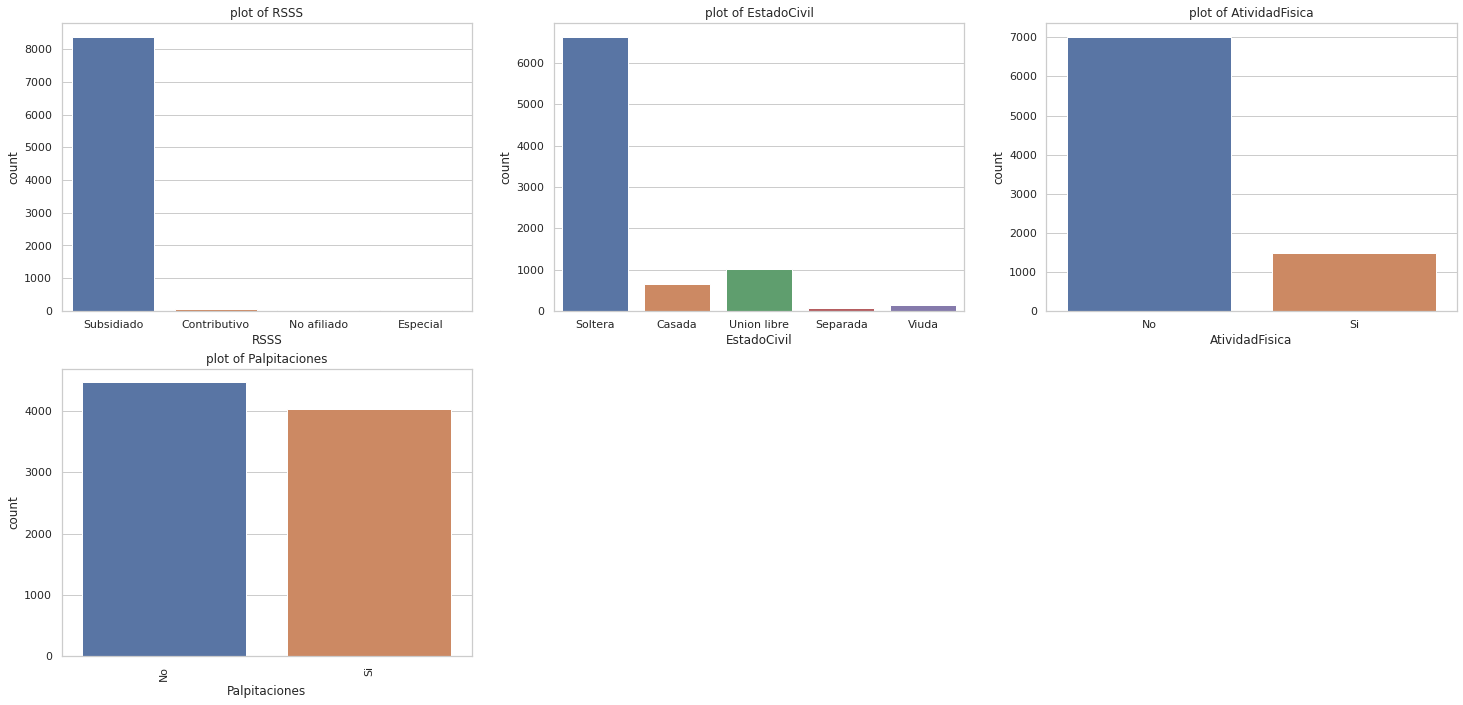

In [ ]:
plt.figure(figsize=(25,18))
vars_to_look = ['RSSS','EstadoCivil','AtividadFisica','Palpitaciones'
                #'Riesgo'
                ]
for i, var in enumerate(vars_to_look):
    plt.subplot(3,3,i+1)
    if i ==3:
        plt.xticks(rotation = 90)
    sns.countplot(pacientes_df[var])
    plt.title("plot of " + var)    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Codigo Diagnostico Principal')

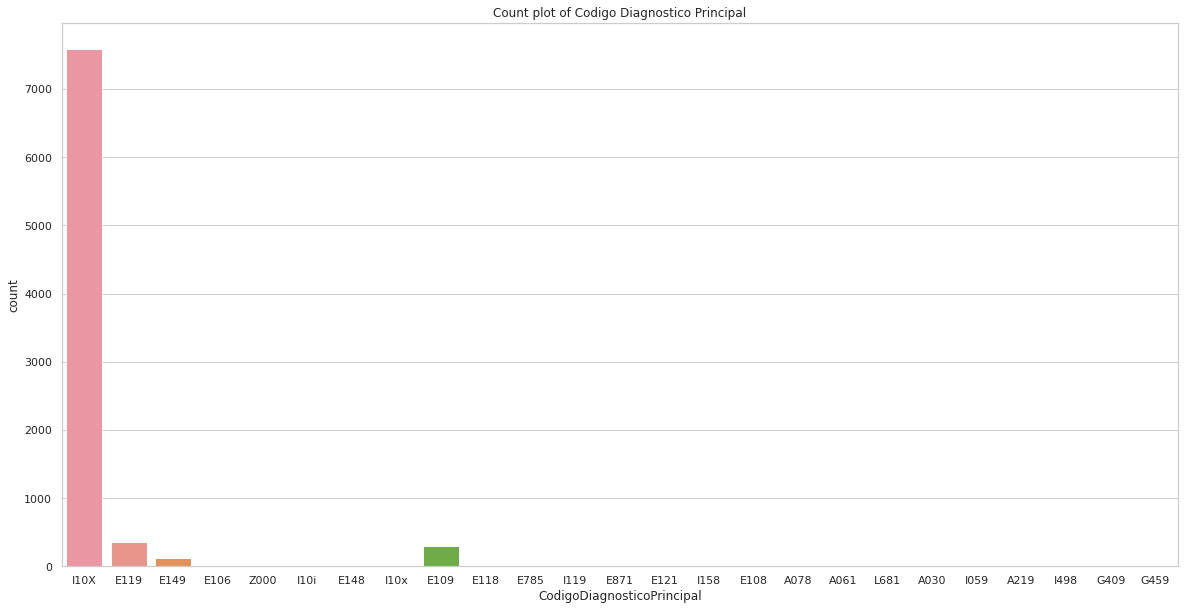

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(pacientes_df['CodigoDiagnosticoPrincipal'])
plt.title("Count plot of Codigo Diagnostico Principal")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Estado_nutricional')

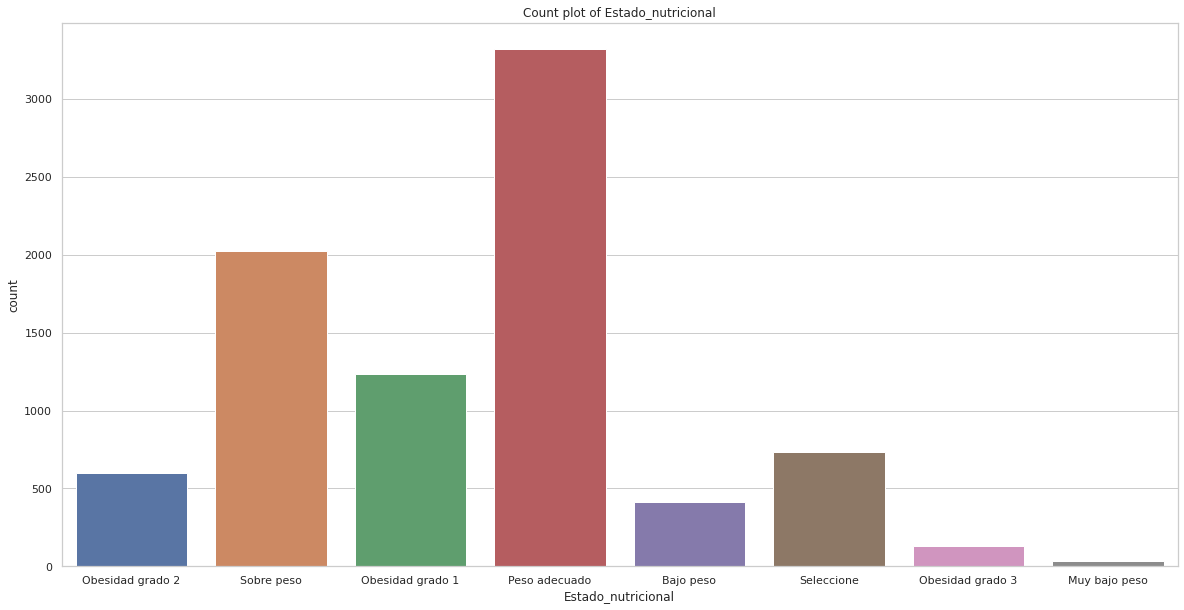

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(pacientes_df['Estado_nutricional'])
plt.title("Count plot of Estado_nutricional")

# 3. Verificacion y Rellenado de Datos Faltantes


In [ ]:
pacientes_df.shape

(8499, 183)

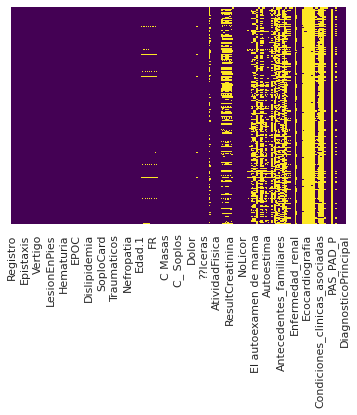

In [ ]:
sns.heatmap(pacientes_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:

for col in pacientes_df.columns:
    pct_missing = np.mean(pacientes_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Registro - 0%
Paciente - 0%
Edad - 0%
RSSS - 0%
Estrato - 0%
EstadoCivil - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hi

In [ ]:
df_1 = pacientes_df.iloc[:,0:99]
df_2 = pacientes_df.iloc[:,100:183]
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Registro            8499 non-null   int64  
 1   Paciente            8499 non-null   int64  
 2   Edad                8499 non-null   int64  
 3   RSSS                8499 non-null   object 
 4   Estrato             8499 non-null   int64  
 5   EstadoCivil         8499 non-null   object 
 6   Cefalea             8499 non-null   object 
 7   Epistaxis           8499 non-null   object 
 8   DisneaME            8499 non-null   object 
 9   Disuria             8499 non-null   object 
 10  Lipotimia           8499 non-null   object 
 11  Palpitaciones       8499 non-null   object 
 12  DisneaGE            8499 non-null   object 
 13  Edemas              8499 non-null   object 
 14  Vertigo             8499 non-null   object 
 15  Precordialgia       8499 non-null   object 
 16  Polidi

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 83 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Extremidades                                            8488 non-null   object 
 1   Pulso.1                                                 7974 non-null   float64
 2   P Pedio                                                 8488 non-null   object 
 3   Sensibilidad                                            8488 non-null   object 
 4   Papiledema                                              8488 non-null   object 
 5   ??lceras                                                8488 non-null   object 
 6   Amputaciones                                            8488 non-null   object 
 7   Hemorragias                                             8488 non-null   object 
 8   Reflejos                              

Se realizo un analisis de datos para verificar los porcentajes de datos faltantes, arrojando como resultado que el 9% de los campos presentan un porcentaje de perdida de datos mayor al 60%, siendo un total de 17 columnas.

In [ ]:
#Eliminando los campos con perdida de datos mayor que el 60%
pacientes_df_filtrado=pacientes_df.drop(['Ateroesclerosis'
,'Ecografia_carotida'
,'Ecocardiografia'
,'EKG','Glicemia_ayunas'
,'Creatinina.1'
,'Diabetes_mellitus_diagnosticada'
,'LOB','Riesgo_perimetro'
,'Condiciones_clinicas_asociadas'
,'3_intervenciones_sobre_factore_riesgo_espec?­fico'
,'Tabaquismo'
,'Riesgo_edad'
,'Prevenci??n_cancer_prostata'
,'Perimetro_abdominal'
,'Violencia intrafamiliar'
,'Abuso sexual']
,axis=1)
pacientes_df_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,NoLicor,DisminuGrasa,DietaBajaSal,Estilosde_vida_saludable,Nutrici??n_y_alimentaci??n,Prevencion_enfermedades_transmisi??n_sexual,Prevencion_cancer_cuello_uterino,El autoexamen de mama,Como_prevenir_diabetes_hipertensi??n_osteoporosis,Consecuencias_del_consumo_alcohol_cigarrillo,Complicaciones _drogas_psicoactivas,Autoestima,autocuidado,1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_a?±os,4_citologia_cervico_uterina,Antecedentes_familiares,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,Disfuncion_renal,Micro_albuminuria,Resultado.1,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS_PAD_T1,PAS_PAD_T2,PAS_PAD_P,ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal
0,373208,50029,61,Subsidiado,1,Soltera,Si,No,No,No,No,No,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,Si,Si,Si,Si,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,Si,NaN,No,No,Si,NaN,NaN,1,NaN,No,120/80,120/80,120/80,Riesgo moderado,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
1,380483,29784,59,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,No,Si,Si,Si,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,Si,NaN,No,No,Si,NaN,NaN,1,NaN,No,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
2,406679,25240,54,Subsidiado,1,Casada,Si,No,No,No,No,No,Si,Si,Si,Si,No,No,No,No,No,No,Si,No,No,Si,Si,No,No,Si,No,No,No,No,Si,No,No,No,No,No,...,Si,Si,Si,Si,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,Si,NaN,No,No,Si,NaN,NaN,NaN,NaN,NaN,110/80,110/80,110/80,Riesgo moderado,NaN,10,15,3,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...
3,394538,29784,59,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,No,No,No,No,No,No,No,Si,No,No,Si,No,No,No,Si,No,No,No,No,No,No,No,No,No,No,...,No,Si,Si,Si,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,Si,NaN,No,No,Si,NaN,NaN,1,NaN,No,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
4,401989,41054,84,Subsidiado,1,Soltera,Si,No,No,No,No,Si,Si,No,Si,Si,No,No,No,No,No,No,Si,No,No,Si,Si,No,No,Si,No,No,Si,No,No,No,No,No,No,No,...,No,Si,Si,Si,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,Si,NaN,No,No,Si,NaN,NaN,1,NaN,No,130/80,130/80,130/80,Riesgo alto,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)


In [ ]:
pacientes_df_filtrado.shape

(8499, 166)

In [ ]:
#Rellenado de Dataframe de pacientes con datos faltantes por el metodo de interpolacion lineal
pacientes_df_filtrado=pacientes_df_filtrado.interpolate(method='linear')

#Rellenado de Dataframe de pacientes que quedaron con datos faltantes para aplicar metodo pad.
pacientes_df_filtrado=pacientes_df_filtrado.fillna(method='pad')

for col in pacientes_df_filtrado.columns:
    pct_missing = np.mean(pacientes_df_filtrado[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Registro - 0%
Paciente - 0%
Edad - 0%
RSSS - 0%
Estrato - 0%
EstadoCivil - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hi

In [ ]:
pacientes_df.shape

(8499, 183)

In [ ]:
#Rellenado de dos columnas que quedaron pendientes utilizando funcion replace
pacientes_df_filtrado.DiagnosticoPrincipal =pacientes_df_filtrado.DiagnosticoPrincipal.replace({np.nan:'NO ESPECIFICADA SIN MENCION DE COMPLICACION'})
#pacientes_df_filtrado.4_citologia_cervico_uterina =pacientes_df_filtrado.4_citologia_cervico_uterina.replace({np.nan:1.0})
df_1_filtrado = pacientes_df_filtrado.iloc[:,0:99]
df_2_filtrado = pacientes_df_filtrado.iloc[:,100:171]

In [ ]:
#Conversion a binario si=1 y no=0
pacientes_df_filtrado=pacientes_df_filtrado.replace({'No':0, 'Si': 1,'true':1,'false':0,'True':1,'False':0})

In [ ]:
pacientes_df.shape

(8499, 183)

In [ ]:
pacientes_df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Columns: 166 entries, Registro to DiagnosticoPrincipal
dtypes: float64(37), int64(114), object(15)
memory usage: 10.8+ MB


In [ ]:
for col in pacientes_df_filtrado.columns:
    pct_missing = np.mean(pacientes_df_filtrado[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Registro - 0%
Paciente - 0%
Edad - 0%
RSSS - 0%
Estrato - 0%
EstadoCivil - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hi

In [ ]:
#Imprimiendo informacion acerca de los campos df1_filtrado
df_1_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Registro            8499 non-null   int64  
 1   Paciente            8499 non-null   int64  
 2   Edad                8499 non-null   int64  
 3   RSSS                8499 non-null   object 
 4   Estrato             8499 non-null   int64  
 5   EstadoCivil         8499 non-null   object 
 6   Cefalea             8499 non-null   object 
 7   Epistaxis           8499 non-null   object 
 8   DisneaME            8499 non-null   object 
 9   Disuria             8499 non-null   object 
 10  Lipotimia           8499 non-null   object 
 11  Palpitaciones       8499 non-null   object 
 12  DisneaGE            8499 non-null   object 
 13  Edemas              8499 non-null   object 
 14  Vertigo             8499 non-null   object 
 15  Precordialgia       8499 non-null   object 
 16  Polidi

In [ ]:
#Imprimiendo informacion acerca de los campos df2_filtrado
df_2_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 66 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Extremidades                                            8499 non-null   object 
 1   Pulso.1                                                 8499 non-null   float64
 2   P Pedio                                                 8499 non-null   object 
 3   Sensibilidad                                            8499 non-null   object 
 4   Papiledema                                              8499 non-null   object 
 5   ??lceras                                                8499 non-null   object 
 6   Amputaciones                                            8499 non-null   object 
 7   Hemorragias                                             8499 non-null   object 
 8   Reflejos                              

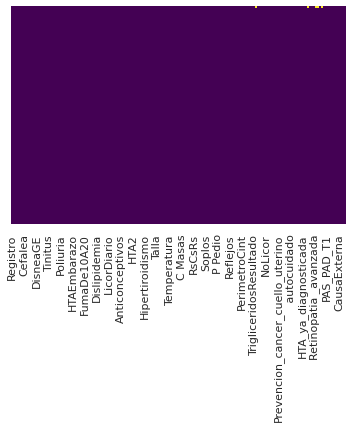

In [ ]:
sns.heatmap(pacientes_df_filtrado.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
pacientes_df_filtrado.shape

(8499, 166)

# 4. Codigo para exportar pacientes_df_filtrado a Drive

In [ ]:
# Codigo para exportar a drive pacientes_df_filtrado 
from google.colab import drive
drive.mount('drive')
pacientes_df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# 5. Identificando Variables Categoricas

In [ ]:
#identificando variables categoricas
categoricals = pacientes_df_filtrado.select_dtypes(include=['object']).copy()
print(categoricals.head())
print(categoricals.isnull().sum())

         RSSS  ...                               DiagnosticoPrincipal
0  Subsidiado  ...                   HIPERTENSION ESENCIAL (PRIMARIA)
1  Subsidiado  ...                   HIPERTENSION ESENCIAL (PRIMARIA)
2  Subsidiado  ...  DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...
3  Subsidiado  ...                   HIPERTENSION ESENCIAL (PRIMARIA)
4  Subsidiado  ...                   HIPERTENSION ESENCIAL (PRIMARIA)

[5 rows x 15 columns]
RSSS                                       0
EstadoCivil                                0
Tension_arterial                           0
Estado_nutricional                         0
Reflejos                                  13
ResultLDL                                  1
ResultCreatinina                           0
Resultado.1                                0
Diabetes_mellitus_(DM2)                    0
PAS_PAD_T1                                 0
PAS_PAD_T2                                 0
PAS_PAD_P                                  0
ClasificacionFina

In [ ]:
pacientes_df.shape

(8499, 183)

In [ ]:
pacientes_df_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,NoLicor,DisminuGrasa,DietaBajaSal,Estilosde_vida_saludable,Nutrici??n_y_alimentaci??n,Prevencion_enfermedades_transmisi??n_sexual,Prevencion_cancer_cuello_uterino,El autoexamen de mama,Como_prevenir_diabetes_hipertensi??n_osteoporosis,Consecuencias_del_consumo_alcohol_cigarrillo,Complicaciones _drogas_psicoactivas,Autoestima,autocuidado,1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_a?±os,4_citologia_cervico_uterina,Antecedentes_familiares,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,Disfuncion_renal,Micro_albuminuria,Resultado.1,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS_PAD_T1,PAS_PAD_T2,PAS_PAD_P,ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal
0,373208,50029,61,Subsidiado,1,Soltera,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo moderado,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
1,380483,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
2,406679,25240,54,Subsidiado,1,Casada,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,110/80,110/80,110/80,Riesgo moderado,1.0,10,15,3,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...
3,394538,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
4,401989,41054,84,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,130/80,130/80,130/80,Riesgo alto,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)


In [ ]:
pacientes_df_filtrado.shape

(8499, 166)

Se analiza el contenido de algunas variables categoricas y se analiza el contenido de estas

In [ ]:
print("RSSS")
print(pacientes_df_filtrado.RSSS.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.RSSS.unique()))
print("--------------------------------")

print("EstadoCivil")
print(pacientes_df_filtrado.EstadoCivil.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.EstadoCivil.unique()))
print("--------------------------------")

print("IMC")
print(pacientes_df_filtrado.IMC.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.IMC.unique()))
print("--------------------------------")

print("Reflejos")
print(pacientes_df_filtrado.Reflejos.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.Reflejos.unique()))
print("--------------------------------")

print("ResultLDL")
print(pacientes_df_filtrado.ResultLDL.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.ResultLDL.unique()))
print("--------------------------------")

print("ResultCreatinina")
print(pacientes_df_filtrado.ResultCreatinina.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.ResultCreatinina.unique()))
print("--------------------------------")

print("TrigliceridosResultado")
print(pacientes_df_filtrado.TrigliceridosResultado.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.TrigliceridosResultado.unique()))
print("--------------------------------")

print("Tension_arterial")
print(pacientes_df_filtrado.Tension_arterial.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.Tension_arterial.unique()))
print("--------------------------------")

RSSS
['Subsidiado' 'Contributivo' 'No afiliado' 'Especial']

cantidad categorías:  4
--------------------------------
EstadoCivil
['Soltera' 'Casada' 'Union libre' 'Separada' 'Viuda']

cantidad categorías:  5
--------------------------------
IMC
[0.00000000e+00 2.92400000e+01 2.82600000e+01 2.26400000e+01
 2.26000000e+01 3.16200000e+01 1.68100000e+01 1.87300000e+01
 3.91600000e+01 2.37300000e+01 3.20500000e+01 1.41700000e+01
 3.31500000e+01 2.09600000e+01 2.54600000e+01 3.27700000e+01
 3.16400000e+01 2.30500000e+01 2.72700000e+01 2.20400000e+01
 1.96500000e+01 1.94400000e+01 2.79400000e+01 2.28600000e+01
 2.84000000e+01 3.24700000e+01 3.20300000e+01 2.05500000e+01
 2.47800000e+01 4.00600000e+01 2.87200000e+01 2.17800000e+01
 3.16100000e+01 2.38700000e+01 2.70600000e+01 2.72900000e+01
 3.69800000e+01 2.55600000e+01 2.48000000e+01 2.08300000e+01
 2.17600000e+01 1.98100000e+01 4.71800000e+01 2.53000000e+01
 7.05000000e+00 1.41000000e+01 3.04300000e+01 2.22800000e+01
 3.22400000e+01 4.0680

# 6. Conversion de variables de tipo object a numericas

In [ ]:
pacientes_df_filtrado.shape

(8499, 166)

In [ ]:
pacientes_df_filtrado.IMC=pacientes_df_filtrado.IMC.apply(pd.to_numeric)
#pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({',':'.'})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({'1-0':1.0})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({'0-7':0.7})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({'1.0|':1.0})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({'1.T':1.0})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({"0'.7":0.7})
pacientes_df_filtrado.ResultCreatinina =pacientes_df_filtrado.ResultCreatinina.replace({".0.8":0.8})
pacientes_df_filtrado.ResultCreatinina=pacientes_df_filtrado.ResultCreatinina.apply(pd.to_numeric)



In [ ]:
pacientes_df_filtrado.ResultLDL =pacientes_df_filtrado.ResultLDL.replace({' ':0})
pacientes_df_filtrado.ResultLDL=pacientes_df_filtrado.ResultLDL.apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado.TrigliceridosResultado=pacientes_df_filtrado.TrigliceridosResultado.apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado.head()

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,NoLicor,DisminuGrasa,DietaBajaSal,Estilosde_vida_saludable,Nutrici??n_y_alimentaci??n,Prevencion_enfermedades_transmisi??n_sexual,Prevencion_cancer_cuello_uterino,El autoexamen de mama,Como_prevenir_diabetes_hipertensi??n_osteoporosis,Consecuencias_del_consumo_alcohol_cigarrillo,Complicaciones _drogas_psicoactivas,Autoestima,autocuidado,1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_a?±os,4_citologia_cervico_uterina,Antecedentes_familiares,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,Disfuncion_renal,Micro_albuminuria,Resultado.1,Glicemia_postprandial,Diabetes_mellitus_(DM2),PAS_PAD_T1,PAS_PAD_T2,PAS_PAD_P,ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal
0,373208,50029,61,Subsidiado,1,Soltera,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo moderado,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
1,380483,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
2,406679,25240,54,Subsidiado,1,Casada,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,110/80,110/80,110/80,Riesgo moderado,1.0,10,15,3,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...
3,394538,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,120/80,120/80,120/80,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)
4,401989,41054,84,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,130/80,130/80,130/80,Riesgo alto,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA)


In [ ]:
pacientes_df_filtrado.shape

(8499, 166)

In [ ]:

pacientes_df_filtrado["PAS_PAD_T1"].fillna("0/0", inplace = True)
pacientes_df_filtrado["PAS_PAD_T2"].fillna("0/0", inplace = True)
pacientes_df_filtrado["PAS_PAD_P"].fillna("0/0", inplace = True)

In [ ]:
pacientes_df_filtrado["PAS_PAD_T1"].unique()

array(['120/80', '110/80', '130/80', '120/70', '140/90', '160/100', '/',
       '90/60', '140/80', '120/60', '110/60', '130/70', '110/70',
       '140/60', '100/60', '140/70', '130/90', '120/870', '150/80',
       '130/100', '160/90', '150/90', '130/60', '100/70', '100/80',
       '120/90', '170/80', '160/80', '100/90', '134/80', '133/80',
       '170/60', '150/70', 'oct-80', '180/90', '120/79', '129/80',
       '150/100', '120/', '130/810', '120/87', '170/70', '150/60',
       '110/75', '130/', '120/20', '140/100', '180/110', '129/70'],
      dtype=object)

In [ ]:
pacientes_df_filtrado["PAS_PAD_T2"].unique()

array(['120/80', '110/80', '130/80', '120/70', '140/90', '150/90',
       '129/80', '/', '90/60', '150/85', '110/75', '115/80', '135/80',
       '120/75', '0/0', '120/60', '140/85', '110/60', '125/75', '140/80',
       '115/75', '110/70', '125/80', '105/80', '150/80', '140/60',
       '115/65', '100/60', '140/95', '145/85', '140/70', '130/75',
       '135/95', '120/475', '115/70', '155/80', '110/330.5', '135/100',
       '110/55', '130/70', '160/90', '155/90', '135/70', '145/95',
       '130/60', '165/90', '140/75', '135/90', '100/70', '120/65',
       '100/80', '110/85', '120/90', '170/80', '160/80', '100/90',
       '145/90', '130/90', '132/80', '120/85', '105/70', '131.5/80',
       '170/60', '130/85', '145/80', '150/70', '155/95', '65/80',
       '180/90', '120/74.5', '124.5/80', '125/90', '124.5/75', '150/100',
       '120/0', '125/445', '120/87', '117/75', '145/70', '150/60',
       '110/72.5', '125/70', '66/70', '120/84', '120/83.5', '125/0',
       '120/50', '120/44', '140/100'

In [ ]:
pacientes_df_filtrado["PAS_PAD_T1"].unique()

array(['120/80', '110/80', '130/80', '120/70', '140/90', '160/100', '/',
       '90/60', '140/80', '120/60', '110/60', '130/70', '110/70',
       '140/60', '100/60', '140/70', '130/90', '120/870', '150/80',
       '130/100', '160/90', '150/90', '130/60', '100/70', '100/80',
       '120/90', '170/80', '160/80', '100/90', '134/80', '133/80',
       '170/60', '150/70', 'oct-80', '180/90', '120/79', '129/80',
       '150/100', '120/', '130/810', '120/87', '170/70', '150/60',
       '110/75', '130/', '120/20', '140/100', '180/110', '129/70'],
      dtype=object)

Se identifican columnas que contiene datos numéricos compuestos en el formato presionarterial diastólica/ presión artterial diastóloca en diferentes tiempos, para ello se divide el dato y se crean nuevas columnas

In [ ]:
pacientes_df_filtrado["PAS_PAD_T1_1"]=pacientes_df_filtrado["PAS_PAD_T1"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["PAS_PAD_T1_2"]=pacientes_df_filtrado["PAS_PAD_T1"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["PAS_PAD_T2_1"]=pacientes_df_filtrado["PAS_PAD_T2"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["PAS_PAD_T2_2"]=pacientes_df_filtrado["PAS_PAD_T2"].apply(lambda x:str(x).split('/')[1])
pacientes_df_filtrado["PAS_PAD_P_1"]=pacientes_df_filtrado["PAS_PAD_P"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["PAS_PAD_P_2"]=pacientes_df_filtrado["PAS_PAD_P"].apply(lambda x:str(x).split('/')[0])

pacientes_df_filtrado.drop(["PAS_PAD_T1",'PAS_PAD_T2','PAS_PAD_P'],axis=1,inplace=True)
pacientes_df_filtrado.head(5)

,Registro,Paciente,Edad,RSSS,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,...,Estilosde_vida_saludable,Nutrici??n_y_alimentaci??n,Prevencion_enfermedades_transmisi??n_sexual,Prevencion_cancer_cuello_uterino,El autoexamen de mama,Como_prevenir_diabetes_hipertensi??n_osteoporosis,Consecuencias_del_consumo_alcohol_cigarrillo,Complicaciones _drogas_psicoactivas,Autoestima,autocuidado,1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_a?±os,4_citologia_cervico_uterina,Antecedentes_familiares,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,Disfuncion_renal,Micro_albuminuria,Resultado.1,Glicemia_postprandial,Diabetes_mellitus_(DM2),ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,TipoDiagnostico,CodigoDiagnosticoPrincipal,DiagnosticoPrincipal,PAS_PAD_T1_1,PAS_PAD_T1_2,PAS_PAD_T2_1,PAS_PAD_T2_2,PAS_PAD_P_1,PAS_PAD_P_2
0,373208,50029,61,Subsidiado,1,Soltera,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,Riesgo moderado,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),120,120,120,80,120,120
1,380483,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),120,120,120,80,120,120
2,406679,25240,54,Subsidiado,1,Casada,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,Riesgo moderado,1.0,10,15,3,E119,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN M...,110,110,110,80,110,110
3,394538,29784,59,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,Riesgo bajo,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),120,120,120,80,120,120
4,401989,41054,84,Subsidiado,1,Soltera,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,...,1,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,0,Riesgo alto,1.0,10,15,3,I10X,HIPERTENSION ESENCIAL (PRIMARIA),130,130,130,80,130,130


In [ ]:
#Pendiente al igual que clasificaionderiesgofinal
pacientes_df_filtrado["PAS_PAD_P_1"].unique()

array(['120', '110', '130', '140', '155', '124.5', '0'], dtype=object)

In [ ]:

pacientes_df_filtrado["PAS_PAD_P_2"].unique()

array(['120', '110', '130', '140', '155', '124.5', '0'], dtype=object)

In [ ]:
pacientes_df_filtrado["PAS_PAD_T1_1"].replace({'': '0'},inplace=True)
pacientes_df_filtrado["PAS_PAD_T1_2"].replace({'': '0'},inplace=True)
pacientes_df_filtrado["PAS_PAD_T2_1"].replace({'': '0'},inplace=True)
pacientes_df_filtrado["PAS_PAD_T2_2"].replace({'': '0'},inplace=True)
pacientes_df_filtrado["PAS_PAD_P_1"].replace({'': '0'},inplace=True)
pacientes_df_filtrado["PAS_PAD_P_2"].replace({'': '0'},inplace=True)

In [ ]:
pacientes_df_filtrado["PAS_PAD_T1_1"].unique()
pacientes_df_filtrado["PAS_PAD_T1_2"].unique()

array(['120', '110', '130', '140', '160', '0', '90', '100', '150', '170',
       '134', '133', 'oct-80', '180', '129'], dtype=object)

In [ ]:
pacientes_df_filtrado.PAS_PAD_T1_1 = pacientes_df_filtrado.PAS_PAD_T1_1.replace({'oct-80':80})
pacientes_df_filtrado.PAS_PAD_T1_1 = pacientes_df_filtrado.PAS_PAD_T1_1.apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado.PAS_PAD_T1_2 = pacientes_df_filtrado.PAS_PAD_T1_2.replace({'oct-80':80})
pacientes_df_filtrado.PAS_PAD_T1_2 = pacientes_df_filtrado.PAS_PAD_T1_2.apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado.PAS_PAD_T2_2  = pacientes_df_filtrado.PAS_PAD_T2_2.apply(pd.to_numeric)
#pacientes_dffiltrado.PAS_PAD_P_1  = pacientes_df_filtrado.PAS_PAD_P_1.apply(pd.to_numeric)

In [ ]:
#pacientes_df_filtrado[["PAS-PAD_T1_1", "PAS-PAD_T1_2","PAS-PAD_T2_1","PAS-PAD_T2_2","PAS-PAD_P_1","PAS-PAD_P_2"]] = pacientes_df_filtrado[["PAS-PAD_T1_1", "PAS-PAD_T1_2","PAS-PAD_T2_1","PAS-PAD_T2_2","PAS-PAD_P_1","PAS-PAD_P_2"]].apply(pd.to_numeric)

In [ ]:
# se extraen los datos de la tensión arterial y se dividen en columnas
pacientes_df_filtrado['Tension_arterial'].unique()
pacientes_df_filtrado["Tension_arterial"].fillna("0/0", inplace = True)
pacientes_df_filtrado["Tension_arterial_sistolica"]=pacientes_df_filtrado["Tension_arterial"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["Tension_arterial_diastolica"]=pacientes_df_filtrado["Tension_arterial"].apply(lambda x:str(x).split('/')[1])

pacientes_df_filtrado.drop(["Tension_arterial"],axis=1,inplace=True)
pacientes_df_filtrado[["Tension_arterial_sistolica", "Tension_arterial_diastolica"]] = pacientes_df_filtrado[["Tension_arterial_sistolica", "Tension_arterial_diastolica"]].apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado["Estado_nutricional"].replace({'Seleccione': 'Peso adecuado'},inplace=True)
pacientes_df_filtrado['Estado_nutricional'].fillna('Peso adecuado',inplace=True)
#convertir en numerica la variable estado_nutricional
mapp={'Muy bajo peso':0,
      'Bajo peso':1,
      'Peso adecuado':2,
      'Sobre peso':3,
      'Obesidad grado 1':4,
      'Obesidad grado 2':5,
      'Obesidad grado 3':6
     }
pacientes_df_filtrado['Estado_nutricional']=pacientes_df_filtrado['Estado_nutricional'].map(mapp)


In [ ]:
#identificando variables categoricas por segunda vez
categoricals2 = pacientes_df_filtrado.select_dtypes(include=['object']).copy()
print(categoricals2.head())
print(categoricals2.isnull().sum())

         RSSS EstadoCivil Reflejos  ... PAS_PAD_T2_1 PAS_PAD_P_1 PAS_PAD_P_2
0  Subsidiado     Soltera      NaN  ...          120         120         120
1  Subsidiado     Soltera      NaN  ...          120         120         120
2  Subsidiado      Casada      NaN  ...          110         110         110
3  Subsidiado     Soltera      NaN  ...          120         120         120
4  Subsidiado     Soltera      NaN  ...          130         130         130

[5 rows x 11 columns]
RSSS                                       0
EstadoCivil                                0
Reflejos                                  13
Resultado.1                                0
Diabetes_mellitus_(DM2)                    0
ClasificacionFinalRiesgoCardiovascular     0
CodigoDiagnosticoPrincipal                 0
DiagnosticoPrincipal                       0
PAS_PAD_T2_1                               0
PAS_PAD_P_1                                0
PAS_PAD_P_2                                0
dtype: int64


In [ ]:
print("RSSS")
print(pacientes_df_filtrado.RSSS.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.RSSS.unique()))
print("--------------------------------")

print("EstadoCivil")
print(pacientes_df_filtrado.EstadoCivil.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.EstadoCivil.unique()))
print("--------------------------------")

print("Reflejos")
print(pacientes_df_filtrado.Reflejos.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.Reflejos.unique()))
print("--------------------------------")

print("Resultado.1")
print(pacientes_df_filtrado["Resultado.1"].unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado["Resultado.1"].unique()))
print("--------------------------------")

print("Diabetes_mellitus_(DM2)")
print(pacientes_df_filtrado['Diabetes_mellitus_(DM2)'].unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado['Diabetes_mellitus_(DM2)'].unique()))
print("--------------------------------")

print("TipoDiagnostico")
print(pacientes_df_filtrado.TipoDiagnostico.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.TipoDiagnostico.unique()))
print("--------------------------------")

print("CodigoDiagnosticoPrincipal")
print(pacientes_df_filtrado.CodigoDiagnosticoPrincipal.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.CodigoDiagnosticoPrincipal.unique()))
print("--------------------------------")

print("DiagnosticoPrincipal")
print(pacientes_df_filtrado.DiagnosticoPrincipal.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.DiagnosticoPrincipal.unique()))
print("--------------------------------")

print("PAS_PAD_T2_1")
print(pacientes_df_filtrado.PAS_PAD_T2_1.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.PAS_PAD_T2_1.unique()))
print("--------------------------------")

print("PAS_PAD_P_1")
print(pacientes_df_filtrado.PAS_PAD_P_1.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.PAS_PAD_P_1.unique()))
print("--------------------------------")

print("PAS_PAD_P_2")
print(pacientes_df_filtrado.PAS_PAD_P_2.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.PAS_PAD_P_2.unique()))
print("--------------------------------")

RSSS
['Subsidiado' 'Contributivo' 'No afiliado' 'Especial']

cantidad categorías:  4
--------------------------------
EstadoCivil
['Soltera' 'Casada' 'Union libre' 'Separada' 'Viuda']

cantidad categorías:  5
--------------------------------
Reflejos
[nan 'Normal' 'Anormal']

cantidad categorías:  3
--------------------------------
Resultado.1
['1' 0 1]

cantidad categorías:  3
--------------------------------
Diabetes_mellitus_(DM2)
[0 '120/80' '90/60' '130/80' '160/90' '110/70' '140/80' '/' '120/60'
 '140/90' '110/60' '110/80' '100/80' '160/80' '140/60' '120/70' '100/60'
 '140/100' '150/90' '140/70' '110/601' '110/50' '130/70' '150/100'
 '130/60' '170/90' '100/70' '110/90' '130/90' '120/90' '170/100' '170/80'
 '100/90' '150/80' '170/60' '150/70' '180/100' '160/100' '180/90' '120/87'
 '114/80' '150/60' '129/80' 'dic-70' '120/88' '120/8' '200/110']

cantidad categorías:  47
--------------------------------
TipoDiagnostico
[3 1 2]

cantidad categorías:  3
-------------------------------

In [ ]:
pacientes_df_filtrado=pacientes_df_filtrado.drop(['RSSS','DiagnosticoPrincipal','TipoDiagnostico'],axis=1)

In [ ]:
pacientes_df_filtrado.shape

(8499, 167)

In [ ]:
mapp2={'Anormal':0,
      'Normal':1
     }
pacientes_df_filtrado['Reflejos']=pacientes_df_filtrado['Reflejos'].map(mapp2)

In [ ]:
pacientes_df_filtrado['Resultado.1'] = pacientes_df_filtrado['Resultado.1'].apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado['PAS_PAD_T2_1'] = pacientes_df_filtrado['PAS_PAD_T2_1'].apply(pd.to_numeric)

In [ ]:
#[5 rows x 11 columns]
#RSSS                          0 --- Eliminar: una sola categoria --------- OK
#EstadoCivil                   0 --- Dummy                        --------- OK
#Reflejos                      0 --- Convertir a Binario          --------- OK
#Resultado.1                   0 --- Convertir a numerico         --------- OK
#Diabetes_mellitus_(DM2)       0 --- Split / generar dos columnas --------- OK
#TipoDiagnostico               0 --- Revisar Detalle en dataframe -- Elimin OK
#CodigoDiagnosticoPrincipal    0 --- Dummy                        --------- OK
#DiagnosticoPrincipal          0 --- Eliminar: repetida           --------- OK
#PAS_PAD_T2_1                  0 --- Convertir numerico           --------- OK
#PAS_PAD_P_1                   0 --- Revisar Detalle dataframe    --------- OK
#PAS_PAD_P_2                   0 --- Revisar Detalle dataframe    --------- OK

In [ ]:
#Revisando la ultimas variables pedientes de convertir de objeto a tipo numericas
print("Diabetes_mellitus_(DM2)")
print(pacientes_df_filtrado['Diabetes_mellitus_(DM2)'].unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado['Diabetes_mellitus_(DM2)'].unique()))
print("--------------------------------")

print("PAS_PAD_P_1")
print(pacientes_df_filtrado.PAS_PAD_P_1.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.PAS_PAD_P_1.unique()))
print("--------------------------------")

print("PAS_PAD_P_2")
print(pacientes_df_filtrado.PAS_PAD_P_2.unique())
print()
print("cantidad categorías: ", len(pacientes_df_filtrado.PAS_PAD_P_2.unique()))
print("--------------------------------")

Diabetes_mellitus_(DM2)
[0 '120/80' '90/60' '130/80' '160/90' '110/70' '140/80' '/' '120/60'
 '140/90' '110/60' '110/80' '100/80' '160/80' '140/60' '120/70' '100/60'
 '140/100' '150/90' '140/70' '110/601' '110/50' '130/70' '150/100'
 '130/60' '170/90' '100/70' '110/90' '130/90' '120/90' '170/100' '170/80'
 '100/90' '150/80' '170/60' '150/70' '180/100' '160/100' '180/90' '120/87'
 '114/80' '150/60' '129/80' 'dic-70' '120/88' '120/8' '200/110']

cantidad categorías:  47
--------------------------------
PAS_PAD_P_1
['120' '110' '130' '140' '155' '124.5' '0']

cantidad categorías:  7
--------------------------------
PAS_PAD_P_2
['120' '110' '130' '140' '155' '124.5' '0']

cantidad categorías:  7
--------------------------------


In [ ]:
#Eliminando los registros troqueados columna PAS_PAD_P_1 = 96 filas
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '120') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '140') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '110') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '130') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '155') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '124.5') ].index)
#pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado.PAS_PAD_P_1 == '0') ].index)

In [ ]:
pacientes_df_filtrado.shape

(8499, 167)

In [ ]:
#convertir en numerica la variable PAS_PAD_P_1
mapp={'Riesgo bajo':0,
      'Riesgo promedio no intervenci??n':1,
      'Riesgo promedio':2,
      'Riesgo moderado':3,
      'Riesgo alto':4,
      'Riesgo muy alto':5
     }
pacientes_df_filtrado['PAS_PAD_P_1']=pacientes_df_filtrado['PAS_PAD_P_1'].map(mapp)

In [ ]:
'''#convertir en numerica la variable PAS_PAD_P_2
mapp={'Riesgo bajo':0,
      'Riesgo promedio no intervenci??n':1,
      'Riesgo promedio':2,
      'Riesgo moderado':3,
      'Riesgo alto':4,
      'Riesgo muy alto':5
     }
pacientes_df_filtrado['PAS_PAD_P_2']=pacientes_df_filtrado['PAS_PAD_P_2'].map(mapp)'''

"#convertir en numerica la variable PAS_PAD_P_2\nmapp={'Riesgo bajo':0,\n      'Riesgo promedio no intervenci??n':1,\n      'Riesgo promedio':2,\n      'Riesgo moderado':3,\n      'Riesgo alto':4,\n      'Riesgo muy alto':5\n     }\npacientes_df_filtrado['PAS_PAD_P_2']=pacientes_df_filtrado['PAS_PAD_P_2'].map(mapp)"

In [ ]:
#Pasando las variables a tipo de datos numericos
pacientes_df_filtrado.PAS_PAD_P_1=pacientes_df_filtrado.PAS_PAD_P_1.apply(pd.to_numeric)
pacientes_df_filtrado.PAS_PAD_P_2=pacientes_df_filtrado.PAS_PAD_P_2.apply(pd.to_numeric)

In [ ]:
pacientes_df_filtrado["Diabetes_mellitus_(DM2)"].fillna("0/0", inplace = True)


In [ ]:
# Se crean dos campos apartir de la columna Diabetes_mellitus_(DM2), ya que contiene dos valores internamente

pacientes_df_filtrado["Diabetes_mellitus_(DM2)_1"]=pacientes_df_filtrado["Diabetes_mellitus_(DM2)"].apply(lambda x:str(x).split('/')[0])
pacientes_df_filtrado["Diabetes_mellitus_(DM2)_2"]=pacientes_df_filtrado["Diabetes_mellitus_(DM2)"].apply(lambda x:str(x).split('/')[0])

pacientes_df_filtrado.drop(['Diabetes_mellitus_(DM2)'],axis=1,inplace=True)

In [ ]:
#Pasando las variables a tipo de datos numericos
pacientes_df_filtrado = pacientes_df_filtrado.drop(pacientes_df_filtrado[(pacientes_df_filtrado["Diabetes_mellitus_(DM2)_1"] == 'dic-70') ].index)
pacientes_df_filtrado["Diabetes_mellitus_(DM2)_1"]=pacientes_df_filtrado["Diabetes_mellitus_(DM2)_1"].apply(pd.to_numeric)
pacientes_df_filtrado["Diabetes_mellitus_(DM2)_2"]=pacientes_df_filtrado["Diabetes_mellitus_(DM2)_2"].apply(pd.to_numeric)

In [ ]:
#Rellenado de Dataframe de pacientes con datos faltantes por el metodo de interpolacion lineal
pacientes_df_filtrado=pacientes_df_filtrado.interpolate(method='linear')

In [ ]:
pacientes_df.shape

(8499, 183)

# 7. Verificacion y analisis de variable de Respuesta

In [ ]:
print('-----total de filas:',len(pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular']))
#eliminar filas con valores nan en la variable dependiente
print('-----catidad de valores NaN:',pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular'].isnull().sum())
pacientes_df_filtrado=pacientes_df_filtrado.dropna(subset=['ClasificacionFinalRiesgoCardiovascular'])
print('-----catidad de valores resultantes:',len(pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular']))

-----total de filas: 8494
-----catidad de valores NaN: 0
-----catidad de valores resultantes: 8494


In [ ]:
pacientes_df_filtrado.shape

(8494, 168)

In [ ]:
print("ClasificacionFinalRiesgoCardiovascular")
print(pacientes_df_filtrado.ClasificacionFinalRiesgoCardiovascular.unique())
print()
print("cantidad de categorías de la variable de respuesta: ", len(pacientes_df_filtrado.ClasificacionFinalRiesgoCardiovascular.unique()))

ClasificacionFinalRiesgoCardiovascular
['Riesgo moderado' 'Riesgo bajo' 'Riesgo alto']

cantidad de categorías de la variable de respuesta:  3


In [ ]:
mapp2={'Riesgo bajo':3,
      'Riesgo moderado':2,
      'Riesgo alto':1 #Riesgo alto
     }
pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular']=pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular'].map(mapp2)

In [ ]:
pacientes_df_filtrado.head()

,Registro,Paciente,Edad,Estrato,EstadoCivil,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,...,Nutrici??n_y_alimentaci??n,Prevencion_enfermedades_transmisi??n_sexual,Prevencion_cancer_cuello_uterino,El autoexamen de mama,Como_prevenir_diabetes_hipertensi??n_osteoporosis,Consecuencias_del_consumo_alcohol_cigarrillo,Complicaciones _drogas_psicoactivas,Autoestima,autocuidado,1_indicaciones_sobre_sus_factores_riesgo_predisponente,2_indicaciones_control_medicina_general_5_a?±os,4_citologia_cervico_uterina,Antecedentes_familiares,Displidemia_(cualquiera),HTA_ya_diagnosticada,Resultado,Enfermedad_renal,Nefropatia_diabetica,Creatinina,Enfermedad_arterial_periferica,Retinopatia _avanzada,Disfuncion_renal,Micro_albuminuria,Resultado.1,Glicemia_postprandial,ClasificacionFinalRiesgoCardiovascular,Resultado.2,FinalidadConsulta,CausaExterna,CodigoDiagnosticoPrincipal,PAS_PAD_T1_1,PAS_PAD_T1_2,PAS_PAD_T2_1,PAS_PAD_T2_2,PAS_PAD_P_1,PAS_PAD_P_2,Tension_arterial_sistolica,Tension_arterial_diastolica,Diabetes_mellitus_(DM2)_1,Diabetes_mellitus_(DM2)_2
0,373208,50029,61,1,Soltera,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,2,1.0,10,15,I10X,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0
1,380483,29784,59,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,3,1.0,10,15,I10X,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0
2,406679,25240,54,1,Casada,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,2,1.0,10,15,E119,110,110,110.0,80.0,NaN,110.0,110.0,80.0,0.0,0.0
3,394538,29784,59,1,Soltera,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,3,1.0,10,15,I10X,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0
4,401989,41054,84,1,Soltera,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1,NaN,0,0,1,NaN,NaN,1,NaN,1,1.0,10,15,I10X,130,130,130.0,80.0,NaN,130.0,130.0,80.0,0.0,0.0


In [ ]:
for col in pacientes_df_filtrado.columns:
    pct_missing = np.mean(pacientes_df_filtrado[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Registro - 0%
Paciente - 0%
Edad - 0%
Estrato - 0%
EstadoCivil - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hipertiroidi

In [ ]:
pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular'].unique()

array([2, 3, 1])

In [ ]:
pacientes_df_filtrado.shape

(8494, 168)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


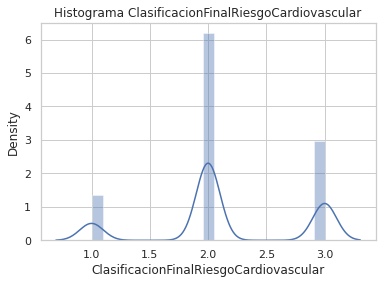

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular'])
plt.title('Histograma ClasificacionFinalRiesgoCardiovascular')
plt.show()

# 8. Implementacion de Dummies a variables categoricas

In [ ]:
pacientes_df_filtrado=pacientes_df_filtrado
pacientes_df_dummies = pd.get_dummies(pacientes_df_filtrado, columns=['EstadoCivil'])
pacientes_df_dummies = pd.get_dummies(pacientes_df_dummies, columns=['CodigoDiagnosticoPrincipal'])
#pacientes_df_dummies=pacientes_df_dummies.drop(['EstadoCivil','CodigoDiagnosticoPrincipal'],axis=1)
pacientes_df_dummies.head()

,Registro,Paciente,Edad,Estrato,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,Angina,...,PAS_PAD_T1_1,PAS_PAD_T1_2,PAS_PAD_T2_1,PAS_PAD_T2_2,PAS_PAD_P_1,PAS_PAD_P_2,Tension_arterial_sistolica,Tension_arterial_diastolica,Diabetes_mellitus_(DM2)_1,Diabetes_mellitus_(DM2)_2,EstadoCivil_Casada,EstadoCivil_Separada,EstadoCivil_Soltera,EstadoCivil_Union libre,EstadoCivil_Viuda,CodigoDiagnosticoPrincipal_A030,CodigoDiagnosticoPrincipal_A061,CodigoDiagnosticoPrincipal_A078,CodigoDiagnosticoPrincipal_A219,CodigoDiagnosticoPrincipal_E106,CodigoDiagnosticoPrincipal_E108,CodigoDiagnosticoPrincipal_E109,CodigoDiagnosticoPrincipal_E118,CodigoDiagnosticoPrincipal_E119,CodigoDiagnosticoPrincipal_E121,CodigoDiagnosticoPrincipal_E148,CodigoDiagnosticoPrincipal_E149,CodigoDiagnosticoPrincipal_E785,CodigoDiagnosticoPrincipal_E871,CodigoDiagnosticoPrincipal_G409,CodigoDiagnosticoPrincipal_G459,CodigoDiagnosticoPrincipal_I059,CodigoDiagnosticoPrincipal_I10X,CodigoDiagnosticoPrincipal_I10i,CodigoDiagnosticoPrincipal_I10x,CodigoDiagnosticoPrincipal_I119,CodigoDiagnosticoPrincipal_I158,CodigoDiagnosticoPrincipal_I498,CodigoDiagnosticoPrincipal_L681,CodigoDiagnosticoPrincipal_Z000
0,373208,50029,61,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,380483,29784,59,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,406679,25240,54,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,110,110,110.0,80.0,NaN,110.0,110.0,80.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,394538,29784,59,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,401989,41054,84,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,130,130,130.0,80.0,NaN,130.0,130.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#identificando variables categoricas por tercera vez
categoricals2 = pacientes_df_dummies.select_dtypes(include=['object']).copy()
print(categoricals2.head())
print(categoricals2.isnull().sum())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Series([], dtype: float64)


In [ ]:
pacientes_df_dummies.head()

,Registro,Paciente,Edad,Estrato,Cefalea,Epistaxis,DisneaME,Disuria,Lipotimia,Palpitaciones,DisneaGE,Edemas,Vertigo,Precordialgia,Polidipsia,Claudicacion,Tinitus,Ortopnea,Polifagia,LesionEnPies,SintomasVisuales,DisneaPxNoc,Poliuria,DolorNeuritico,Sudoracion,DisneaPE,Hematuria,HTA1,HTAEmbarazo,Retinopatia,FumaMenos10,ECVICT,DM1DM2,EPOC,FumaDe10A20,IAM1,DMGestacional,TB,FumaMasDe20,Angina,...,PAS_PAD_T1_1,PAS_PAD_T1_2,PAS_PAD_T2_1,PAS_PAD_T2_2,PAS_PAD_P_1,PAS_PAD_P_2,Tension_arterial_sistolica,Tension_arterial_diastolica,Diabetes_mellitus_(DM2)_1,Diabetes_mellitus_(DM2)_2,EstadoCivil_Casada,EstadoCivil_Separada,EstadoCivil_Soltera,EstadoCivil_Union libre,EstadoCivil_Viuda,CodigoDiagnosticoPrincipal_A030,CodigoDiagnosticoPrincipal_A061,CodigoDiagnosticoPrincipal_A078,CodigoDiagnosticoPrincipal_A219,CodigoDiagnosticoPrincipal_E106,CodigoDiagnosticoPrincipal_E108,CodigoDiagnosticoPrincipal_E109,CodigoDiagnosticoPrincipal_E118,CodigoDiagnosticoPrincipal_E119,CodigoDiagnosticoPrincipal_E121,CodigoDiagnosticoPrincipal_E148,CodigoDiagnosticoPrincipal_E149,CodigoDiagnosticoPrincipal_E785,CodigoDiagnosticoPrincipal_E871,CodigoDiagnosticoPrincipal_G409,CodigoDiagnosticoPrincipal_G459,CodigoDiagnosticoPrincipal_I059,CodigoDiagnosticoPrincipal_I10X,CodigoDiagnosticoPrincipal_I10i,CodigoDiagnosticoPrincipal_I10x,CodigoDiagnosticoPrincipal_I119,CodigoDiagnosticoPrincipal_I158,CodigoDiagnosticoPrincipal_I498,CodigoDiagnosticoPrincipal_L681,CodigoDiagnosticoPrincipal_Z000
0,373208,50029,61,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,380483,29784,59,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,406679,25240,54,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,110,110,110.0,80.0,NaN,110.0,110.0,80.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,394538,29784,59,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,120,120,120.0,80.0,NaN,120.0,120.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,401989,41054,84,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,130,130,130.0,80.0,NaN,130.0,130.0,80.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
pacientes_df_dummies.shape

(8494, 196)

# 9. Analizando matriz de Correlacion entre variables

In [ ]:
df_1 = pacientes_df_dummies.iloc[:,0:20]
df_2 = pacientes_df_dummies.iloc[:,21,:40]
df_3 = pacientes_df_dummies.iloc[:,41:60]
df_4 = pacientes_df_dummies.iloc[:,61:80]
df_5 = pacientes_df_dummies.iloc[:,81:100]
df_6 = pacientes_df_dummies.iloc[:,101:120]
df_7 = pacientes_df_dummies.iloc[:,121:140]
df_8 = pacientes_df_dummies.iloc[:,141:160]
df_9 = pacientes_df_dummies.iloc[:,161:180]
df_10 = pacientes_df_dummies.iloc[:,181:195]

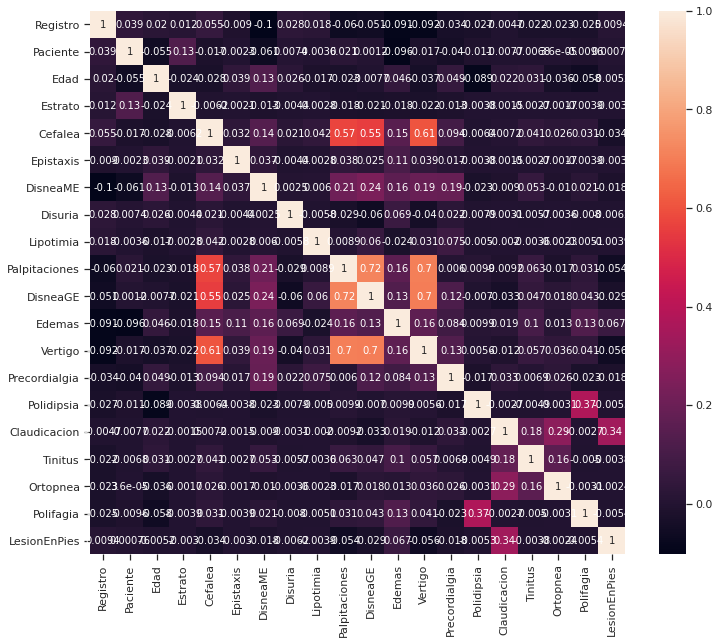

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_1.corr(),annot=True)

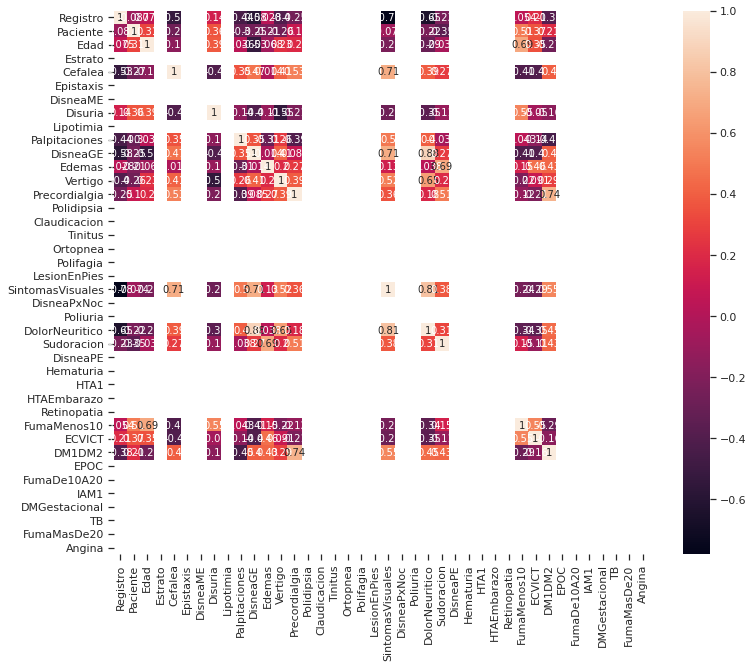

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_2.corr(),annot=True)

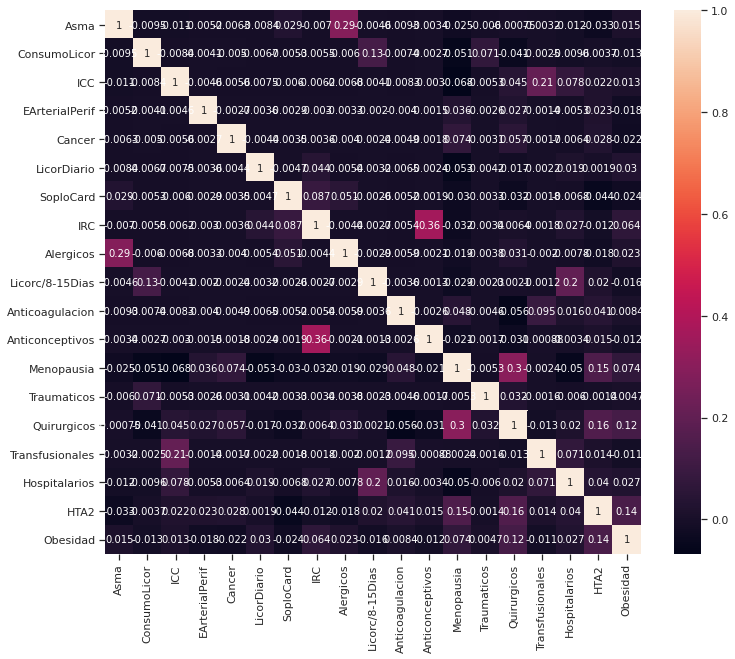

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_3.corr(),annot=True)

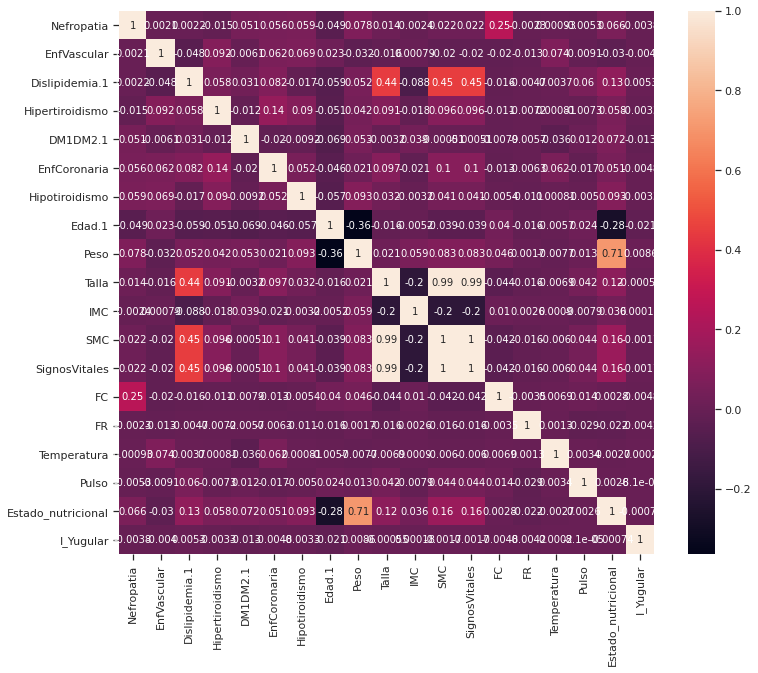

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_4.corr(),annot=True)

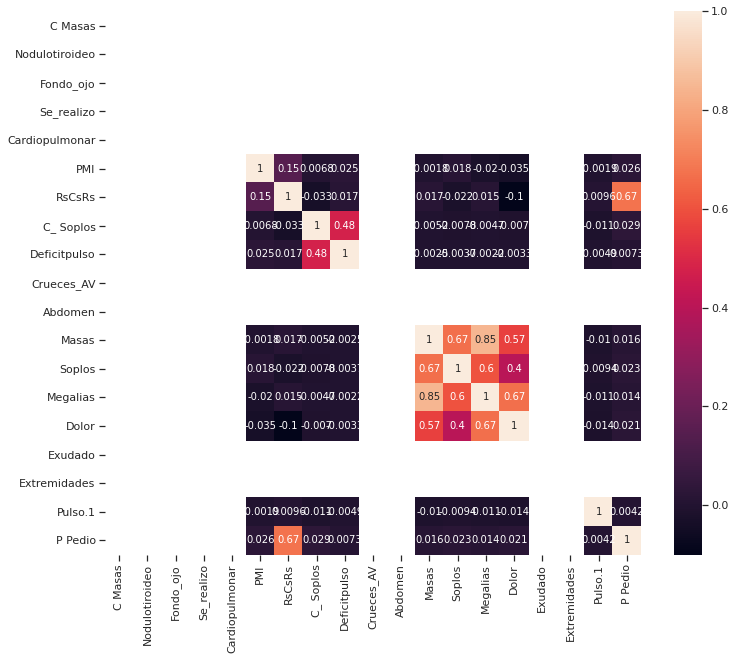

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_5.corr(),annot=True)

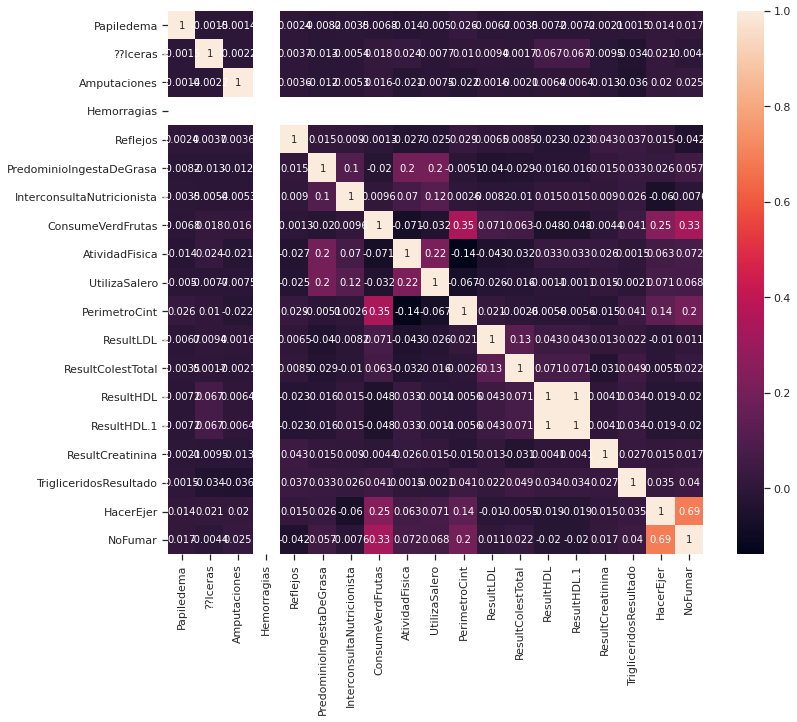

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_6.corr(),annot=True)

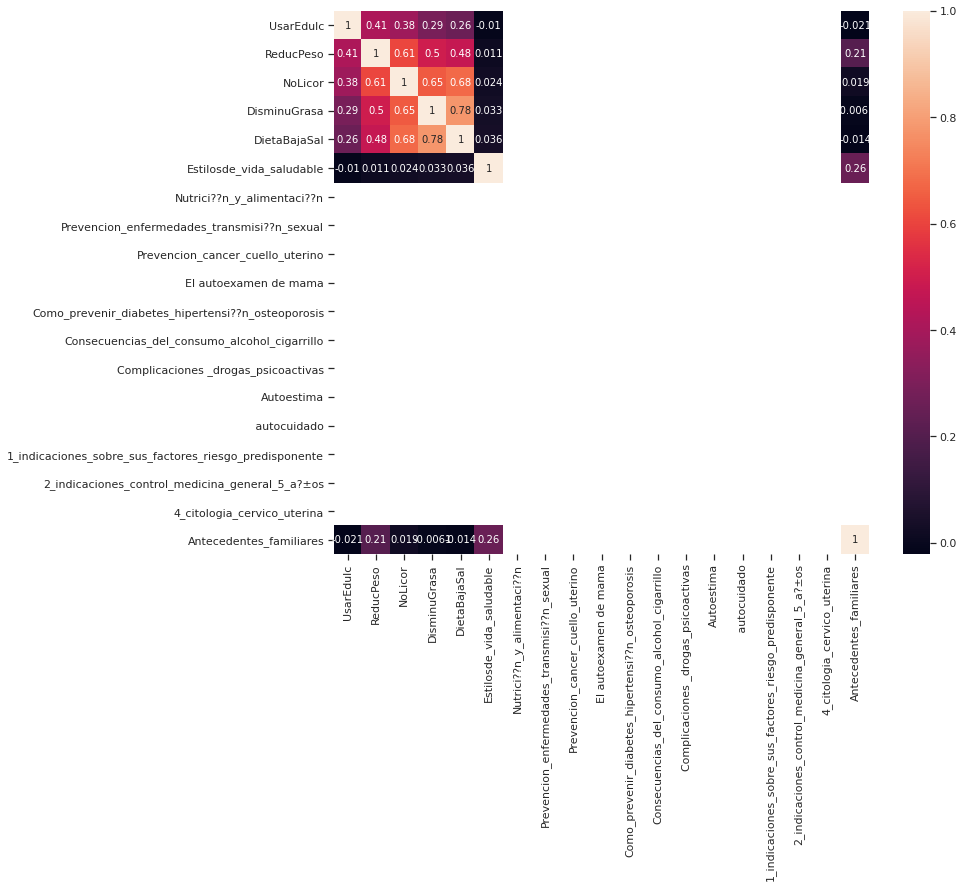

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_7.corr(),annot=True)

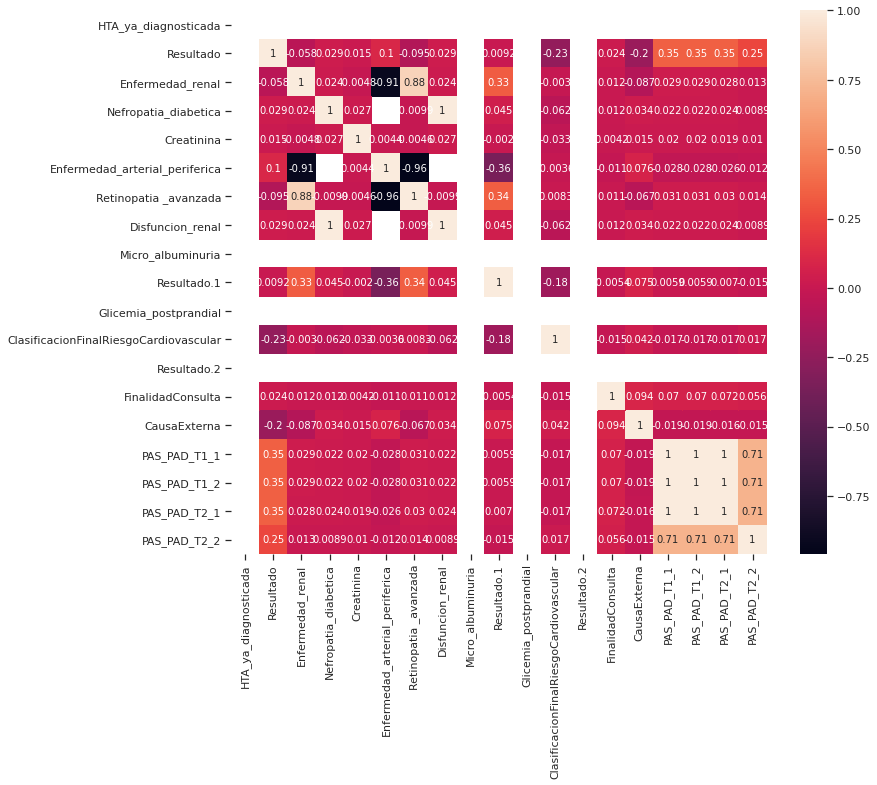

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_8.corr(),annot=True)

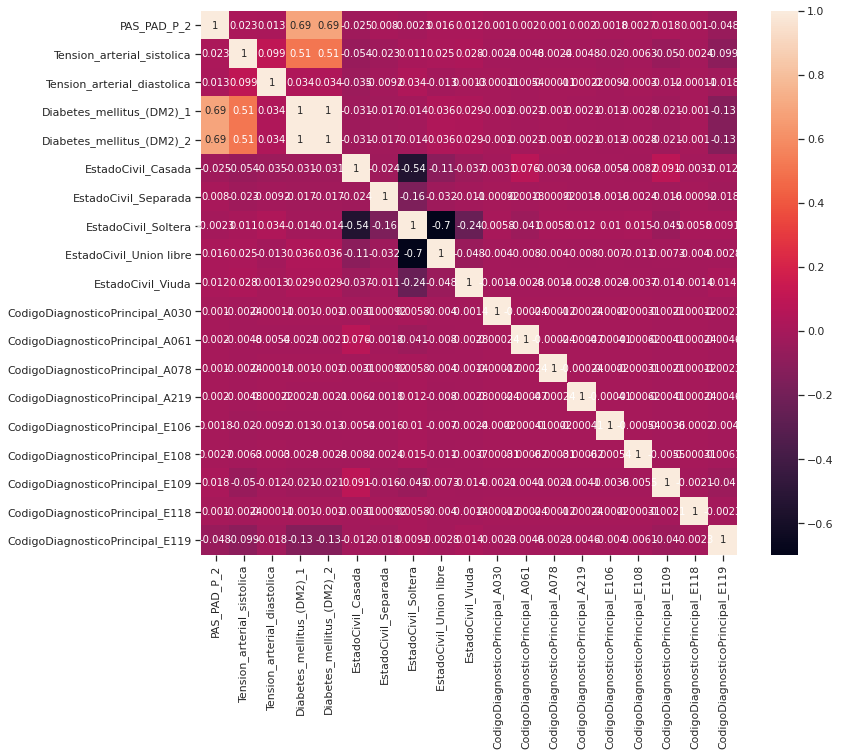

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_9.corr(),annot=True)

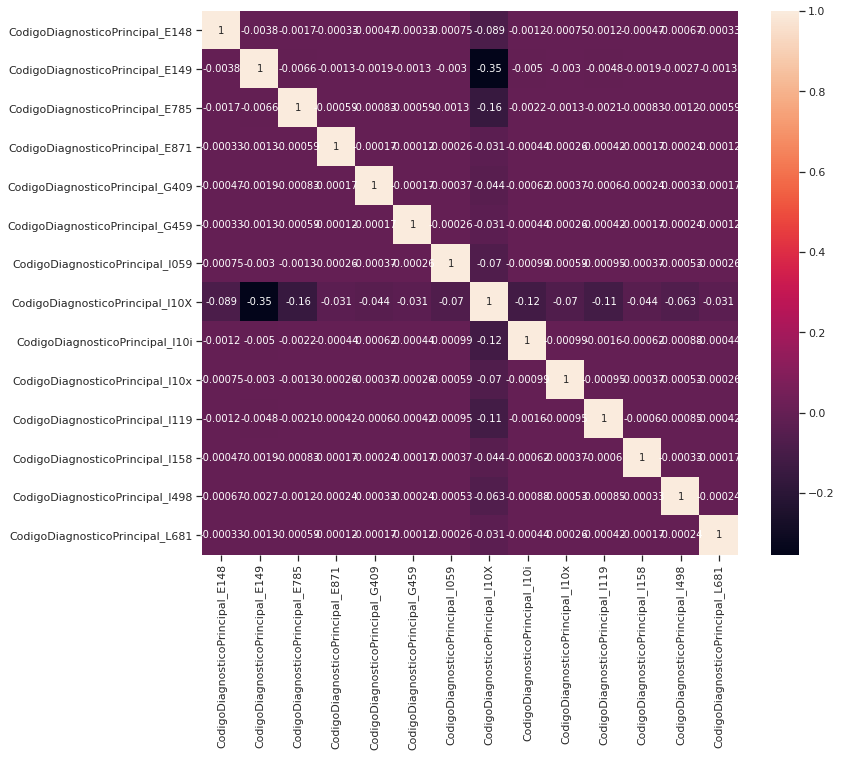

In [ ]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df_10.corr(),annot=True)

In [ ]:
#Feature selection, regresion logistica ) o 

#Eliminacion de variables con regresion variables 

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html (validacion cruzada.....)

In [ ]:
#Dado que son muchas columnas es mas optimo realizar una  matriz de correlacion
# de serie de valores unidimensional y ordenada de menor a mayor corr.
correlation_mat = pacientes_df_dummies.corr ()
corr_pairs = correlation_mat.unstack ()
print (corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Registro                         Registro                           1.000000
                                 Paciente                           0.038545
                                 Edad                               0.020097
                                 Estrato                            0.011917
                                 Cefalea                            0.055498
                                                                      ...   
CodigoDiagnosticoPrincipal_Z000  CodigoDiagnosticoPrincipal_I119   -0.001854
                                 CodigoDiagnosticoPrincipal_I158   -0.000727
                                 CodigoDiagnosticoPrincipal_I498   -0.001028
                                 CodigoDiagnosticoPrincipal_L681   -0.000514
                                 CodigoDiagnosticoPrincipal_Z000    1.000000
Length: 38416, dtype: float64
Retinopatia _avanzada            Enfermedad_arterial_periferica   -0.958710
Enfermedad_arterial_periferica   Retinopatia _a

In [ ]:
#Resumen de correlacion vs variable de respuesta ClasificacionFinalRiesgoCardiovascular
#%%html
#<iframe src="https://drive.google.com/file/d/1WB4h8zNlLJbD0GxH1Is1MGDIsbvJ5cX_/preview" width="640" height="220"></iframe>

Descartar variables aquellas con + bajas y/o negativas  correlacion.  > + ó - 0.4

In [ ]:
print('-----total de filas:',len(pacientes_df_filtrado['ClasificacionFinalRiesgoCardiovascular']))

-----total de filas: 8494


In [ ]:
#from sklearn.linear_model import LinearRegression
#X = df["RM"].values.reshape(-1,1)
#y = df["ClasificacionFinalRiesgoCardiovascular"].values.reshape(-1, 1)

In [ ]:
#reg = LinearRegression().fit(X,y)
#y_hat = reg.predict(X)
#print(y_hat)

In [ ]:
#1. Definir columnas (correlacion vs var respuesta) (Warm up) ---> revisar mapa de calor
#2. Mapa de calor 


In [ ]:
for col in pacientes_df_dummies.columns:
    pct_missing = np.mean(pacientes_df_dummies[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Registro - 0%
Paciente - 0%
Edad - 0%
Estrato - 0%
Cefalea - 0%
Epistaxis - 0%
DisneaME - 0%
Disuria - 0%
Lipotimia - 0%
Palpitaciones - 0%
DisneaGE - 0%
Edemas - 0%
Vertigo - 0%
Precordialgia - 0%
Polidipsia - 0%
Claudicacion - 0%
Tinitus - 0%
Ortopnea - 0%
Polifagia - 0%
LesionEnPies - 0%
SintomasVisuales - 0%
DisneaPxNoc - 0%
Poliuria - 0%
DolorNeuritico - 0%
Sudoracion - 0%
DisneaPE - 0%
Hematuria - 0%
HTA1 - 0%
HTAEmbarazo - 0%
Retinopatia - 0%
FumaMenos10 - 0%
ECVICT - 0%
DM1DM2 - 0%
EPOC - 0%
FumaDe10A20 - 0%
IAM1 - 0%
DMGestacional - 0%
TB - 0%
FumaMasDe20 - 0%
Angina - 0%
Dislipidemia - 0%
Asma - 0%
ConsumoLicor - 0%
ICC - 0%
EArterialPerif - 0%
Cancer - 0%
LicorDiario - 0%
SoploCard - 0%
IRC - 0%
Alergicos - 0%
Licorc/8-15Dias - 0%
Anticoagulacion - 0%
Anticonceptivos - 0%
Menopausia - 0%
Traumaticos - 0%
Quirurgicos - 0%
Transfusionales - 0%
Hospitalarios - 0%
HTA2 - 0%
Obesidad - 0%
IAM2 - 0%
Nefropatia - 0%
EnfVascular - 0%
Dislipidemia.1 - 0%
Hipertiroidismo - 0%
DM1DM2.1

In [ ]:
#Exportar matriz correlaciona a drive
from google.colab import drive
drive.mount('drive')
sorted_pairs.to_csv('data.csv')
!cp data.csv "drive/My Drive/"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


11. Modelo de Regresion Lineal

# 10. Feature Selection

In [ ]:
pacientes_df_dummies.shape

(8494, 196)

In [ ]:
pacientes_df_dummies= pacientes_df_dummies.drop("PAS_PAD_P_1",1) 

In [ ]:
#Rellenado de Dataframe de pacientes con datos faltantes por el metodo de interpolacion lineal ....esta si es para elminar
pacientes_df_dummies=pacientes_df_dummies.interpolate(method='linear')

#Rellenado de Dataframe de pacientes que quedaron con datos faltantes para aplicar metodo pad....esta si es para elminar
pacientes_df_dummies=pacientes_df_dummies.fillna(method='pad')
pacientes_df_dummies = pacientes_df_dummies.dropna ()

In [ ]:
pacientes_df_dummies.shape

(8396, 195)

In [3]:

# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
pacientes_df_2 = pacientes_df_dummies
X = pacientes_df_2.drop("ClasificacionFinalRiesgoCardiovascular",1)   #Feature Matrix
y = pacientes_df_2["ClasificacionFinalRiesgoCardiovascular"]          #Target Variable

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y,  cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

NameError: name 'pacientes_df_dummies' is not defined

In [ ]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
pacientes_df_2 = pacientes_df_dummies
X = pacientes_df_2.drop("ClasificacionFinalRiesgoCardiovascular",1)   #Feature Matrix
y = pacientes_df_2["ClasificacionFinalRiesgoCardiovascular"]          #Target Variable

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 91.000
Column: 4, Selected False, Rank: 40.000
Column: 5, Selected False, Rank: 90.000
Column: 6, Selected False, Rank: 88.000
Column: 7, Selected False, Rank: 86.000
Column: 8, Selected False, Rank: 104.000
Column: 9, Selected False, Rank: 84.000
Column: 10, Selected False, Rank: 64.000
Column: 11, Selected False, Rank: 22.000
Column: 12, Selected False, Rank: 35.000
Column: 13, Selected False, Rank: 75.000
Column: 14, Selected False, Rank: 119.000
Column: 15, Selected False, Rank: 111.000
Column: 16, Selected False, Rank: 81.000
Column: 17, Selected False, Rank: 106.000
Column: 18, Selected False, Rank: 103.000
Column: 19, Selected False, Rank: 100.000
Column: 20, Selected False, Rank: 72.000
Column: 21, Selected False, Rank: 93.000
Column: 22, Selected False, Rank: 117.000
Column: 23, Selected False, Rank: 49.000
Column: 24, Selected Fals

In [ ]:
#Eliminando las variables que no son optimas para el modelo
pacientes_df_dummies=pacientes_df_dummies.drop(['Paciente','P Pedio',
'Alergicos',
'Dislipidemia',
'ConsumoLicor',
'EstadoCivil_Separada',
'ReducPeso',
'Palpitaciones',
'DisneaME',
'EstadoCivil_Viuda',
'CodigoDiagnosticoPrincipal_E149',
'Disuria',
'Deficitpulso',
'Epistaxis',
'Claudicacion',
'Tinitus',
'ConsumeVerdFrutas',
'Estrato',
'CodigoDiagnosticoPrincipal_G459',
'Polifagia',
'DMGestacional',
'CodigoDiagnosticoPrincipal_E871',
'Polidipsia',
'Cancer',
'EstadoCivil_Soltera',
'DisneaPxNoc',
'Licorc/8-15Dias',
'Soplos',
'1_indicaciones_sobre_sus_factores_riesgo_predisponente',
'NoAzucares',
'CodigoDiagnosticoPrincipal_G409',
'Lipotimia',
'IRC',
'LesionEnPies',
'Obesidad',
'CodigoDiagnosticoPrincipal_I059',
'Anticonceptivos',
'Hematuria',
'LicorDiario',
'Poliuria',
'Papiledema',
'TB',
'Amputaciones',
'FumaMenos10',
'Hipertiroidismo',
'??lceras',
'Ortopnea',
'EPOC',
'DisneaPE',
'Hemorragias',
'CodigoDiagnosticoPrincipal_E785',
'PAS_PAD_P_2',
'Prevencion_enfermedades_transmisi??n_sexual',
'Traumaticos',
'2_indicaciones_control_medicina_general_5_a?±os',
'HTAEmbarazo',
'Anticoagulacion',
'PerimetroCint',
'HTA_ya_diagnosticada',
'Estilosde_vida_saludable',
'Transfusionales',
'Autoestima',
'Prevencion_cancer_cuello_uterino',
'Resultado.2',
'Temperatura',
'Nutrici??n_y_alimentaci??n',
'Micro_albuminuria',
'Complicaciones _drogas_psicoactivas',
'El autoexamen de mama',
'Como_prevenir_diabetes_hipertensi??n_osteoporosis',
'I_Yugular',
'Consecuencias_del_consumo_alcohol_cigarrillo',
' autocuidado',
'Glicemia_postprandial',
'IAM2',
'EnfVascular',
'4_citologia_cervico_uterina',
'Nefropatia',
'Soplocarotideo',
'CodigoDiagnosticoPrincipal_A078',
'C Masas',
'Displidemia_(cualquiera)',
'Retinopatia _avanzada',
'DM1DM2.1',
'Nodulotiroideo',
'Enfermedad_arterial_periferica',
'Fondo_ojo',
'Enfermedad_renal',
'CodigoDiagnosticoPrincipal_E121',
'EArterialPerif',
'Se_realizo',
'CodigoDiagnosticoPrincipal_E148',
'Cardiopulmonar',
'CodigoDiagnosticoPrincipal_A030',
'CodigoDiagnosticoPrincipal_E119',
'Creatinina',
'CodigoDiagnosticoPrincipal_A061',
'CodigoDiagnosticoPrincipal_E106',
'CodigoDiagnosticoPrincipal_A219',
'CodigoDiagnosticoPrincipal_E118',
'CodigoDiagnosticoPrincipal_E109',
'CodigoDiagnosticoPrincipal_E108',
'Crueces_AV',
'CodigoDiagnosticoPrincipal_I10i',
'Abdomen',
'CodigoDiagnosticoPrincipal_I10x',
'Masas',
'CodigoDiagnosticoPrincipal_I119',
'CodigoDiagnosticoPrincipal_I158',
'CodigoDiagnosticoPrincipal_I498',
'Megalias',
'CodigoDiagnosticoPrincipal_L681',
'CodigoDiagnosticoPrincipal_Z000',
'Extremidades',
'Exudado',
'EstadoCivil_Union libre',
'Estado_nutricional',
'HTA2',
'FumaDe10A20',
'Vertigo',
'AtividadFisica',
'NoLicor',
'IAM1',
'Angina',
'Sudoracion',
'Hospitalarios',
'FinalidadConsulta',
'Sensibilidad',
'PredominioIngestaDeGrasa',
'Retinopatia',
'HTA1',
'UsarEdulc',
'Dolor',
'C_ Soplos',
'Diabetes_mellitus_(DM2)_1',
'Hipotiroidismo',
'UtilizaSalero',
'Menopausia',
'DisneaGE',
'PAS_PAD_T1_1',
'Diabetes_mellitus_(DM2)_2',
'DolorNeuritico',
'Asma',
'Reflejos',
'EstadoCivil_Casada',
'InterconsultaNutricionista',
'NoFumar',
'DisminuGrasa',
'HacerEjer',
'PAS_PAD_T2_1',
'EnfCoronaria',
'SoploCard',
'Precordialgia',
'FumaMasDe20',
'SintomasVisuales','Registro'
],axis=1)

In [ ]:
'''#---FEAUTURE SELECCTION



pacientes_df_2 = pacientes_df_dummies
X = pacientes_df_2.drop("ClasificacionFinalRiesgoCardiovascular",1)   #Feature Matrix
y = pacientes_df_2["ClasificacionFinalRiesgoCardiovascular"]          #Target Variable

model = LinearRegression()
#Inicializando el modelo RFE
rfe = RFE(model, 10)
#Transformando los datos usando RFE
X_rfe = rfe.fit_transform(X,y)  
#Entreando el modelo
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)'''

'#---FEAUTURE SELECCTION\n\n\n\npacientes_df_2 = pacientes_df_dummies\nX = pacientes_df_2.drop("ClasificacionFinalRiesgoCardiovascular",1)   #Feature Matrix\ny = pacientes_df_2["ClasificacionFinalRiesgoCardiovascular"]          #Target Variable\n\nmodel = LinearRegression()\n#Inicializando el modelo RFE\nrfe = RFE(model, 10)\n#Transformando los datos usando RFE\nX_rfe = rfe.fit_transform(X,y)  \n#Entreando el modelo\nmodel.fit(X_rfe,y)\nprint(rfe.support_)\nprint(rfe.ranking_)'

In [ ]:
df_1_prueba = pacientes_df_dummies.iloc[:,0:100]
df_2_prueba = pacientes_df_dummies.iloc[:,101:200]
df_1_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8396 entries, 98 to 8498
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Edad                                    8396 non-null   int64  
 1   Cefalea                                 8396 non-null   int64  
 2   Edemas                                  8396 non-null   int64  
 3   ECVICT                                  8396 non-null   int64  
 4   DM1DM2                                  8396 non-null   int64  
 5   ICC                                     8396 non-null   int64  
 6   Quirurgicos                             8396 non-null   int64  
 7   Dislipidemia.1                          8396 non-null   int64  
 8   Edad.1                                  8396 non-null   float64
 9   Peso                                    8396 non-null   float64
 10  Talla                                   8396 non-null   flo

In [ ]:
df_2_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8396 entries, 98 to 8498
Empty DataFrame

In [ ]:
'''

#no of features
nof_list=np.arange(1,195)            
high_score=0
#Variables optimas
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Numero optimo de caracteristicas: %d" %nof)
print("Con una puntuacion de %d caracteristicas: %f" % (nof, high_score))

#'''

'\n\n#no of features\nnof_list=np.arange(1,195)            \nhigh_score=0\n#Variables optimas\nnof=0           \nscore_list =[]\nfor n in range(len(nof_list)):\n    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)\n    model = LinearRegression()\n    rfe = RFE(model,nof_list[n])\n    X_train_rfe = rfe.fit_transform(X_train,y_train)\n    X_test_rfe = rfe.transform(X_test)\n    model.fit(X_train_rfe,y_train)\n    score = model.score(X_test_rfe,y_test)\n    score_list.append(score)\n    if(score>high_score):\n        high_score = score\n        nof = nof_list[n]\nprint("Numero optimo de caracteristicas: %d" %nof)\nprint("Con una puntuacion de %d caracteristicas: %f" % (nof, high_score))\n\n#'

In [ ]:
'''cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 87)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)
'''

'cols = list(X.columns)\nmodel = LinearRegression()\n#Initializing RFE model\nrfe = RFE(model, 87)             \n#Transforming data using RFE\nX_rfe = rfe.fit_transform(X,y)  \n#Fitting the data to model\nmodel.fit(X_rfe,y)              \ntemp = pd.Series(rfe.support_,index = cols)\nselected_features_rfe = temp[temp==True].index\nprint(selected_features_rfe)\n'

In [ ]:
'''#Eliminando las variables que no son optimas para el modelo
pacientes_df_dummies=pacientes_df_dummies.drop([
'Resultado','RsCsRs','HTA1','HacerEjer',
'Antecedentes_familiares','PMI','Tension_arterial_sistolica',
'ReducPeso','EstadoCivil_Soltera','PAS_PAD_T2_1','PAS_PAD_T1_2',
'PAS_PAD_T1_1','ResultLDL','PAS_PAD_T2_2','Sensibilidad','AtividadFisica',
'IAM2','Paciente','Edad.1','Tension_arterial_diastolica','FumaDe10A20',
'TrigliceridosResultado','Diabetes_mellitus_(DM2)_1','Diabetes_mellitus_(DM2)_2',
'Pulso.1','Pulso','PerimetroCint','Edad','Quirurgicos','FumaMenos10',
'IAM1','InterconsultaNutricionista','Hipertiroidismo',
'Asma','ConsumeVerdFrutas','Anticoagulacion','FC','Soplos',
'FumaMasDe20','LicorDiario','ResultColestTotal','LesionEnPies',
'Lipotimia','Cancer','Traumaticos','DMGestacional','Masas',
'Deficitpulso','EArterialPerif','Epistaxis','Licorc/8-15Dias','Ortopnea',
'Claudicacion','IMC','Talla','Temperatura','SignosVitales',
'SMC','EstadoCivil_Casada','SintomasVisuales','Resultado.2',
'ResultCreatinina','Obesidad','Estado_nutricional','Peso',
'DisneaGE','Palpitaciones','PAS_PAD_P_1','PAS_PAD_P_2',
'Polifagia','ResultHDL','ResultHDL.1','FinalidadConsulta',
'CausaExterna','DolorNeuritico','FR','Vertigo','DisneaME',
'Hematuria','TB','C Masas','Fondo_ojo','Se_realizo',
'Cardiopulmonar','Crueces_AV','Abdomen','Exudado','Extremidades',
'Hemorragias','Nutrici??n_y_alimentaci??n',
'Prevencion_enfermedades_transmisi??n_sexual',
'Prevencion_cancer_cuello_uterino',
'El autoexamen de mama','Como_prevenir_diabetes_hipertensi??n_osteoporosis',
'Consecuencias_del_consumo_alcohol_cigarrillo','Complicaciones _drogas_psicoactivas',
'Autoestima',' autocuidado','1_indicaciones_sobre_sus_factores_riesgo_predisponente',
'2_indicaciones_control_medicina_general_5_a?±os','4_citologia_cervico_uterina',
'Displidemia_(cualquiera)','HTA_ya_diagnosticada','Enfermedad_arterial_periferica',
'Micro_albuminuria','Glicemia_postprandial',
'CodigoDiagnosticoPrincipal_ENFERMEDAD CARDIACA HIPERTENSIVA SIN INSUFICIENCIA CARDIACA (CONGESTIVA)', # Eliminada porque resultan redundantes con la varaible de respuesta
'CodigoDiagnosticoPrincipal_ENFERMEDAD RENAL HIPERTENSIVA CON INSUFICIENCIA RENAL',# Eliminada porque resultan redundantes con la varaible de respuesta
'CodigoDiagnosticoPrincipal_HIPERTENSION ESENCIAL (PRIMARIA)',# Eliminada porque resultan redundantes con la varaible de respuesta
'CodigoDiagnosticoPrincipal_HIPERTENSION ESENCIAL (PRIMARIA) ENFERM',# Eliminada porque resultan redundantes con la varaible de respuesta
'CodigoDiagnosticoPrincipal_OTROS TIPOS DE HIPERTENSION SECUNDARIA',# Eliminada porque resultan redundantes con la varaible de respuesta
'Nefropatia_diabetica',
'Disfuncion_renal'],axis=1)'''

"#Eliminando las variables que no son optimas para el modelo\npacientes_df_dummies=pacientes_df_dummies.drop([\n'Resultado','RsCsRs','HTA1','HacerEjer',\n'Antecedentes_familiares','PMI','Tension_arterial_sistolica',\n'ReducPeso','EstadoCivil_Soltera','PAS_PAD_T2_1','PAS_PAD_T1_2',\n'PAS_PAD_T1_1','ResultLDL','PAS_PAD_T2_2','Sensibilidad','AtividadFisica',\n'IAM2','Paciente','Edad.1','Tension_arterial_diastolica','FumaDe10A20',\n'TrigliceridosResultado','Diabetes_mellitus_(DM2)_1','Diabetes_mellitus_(DM2)_2',\n'Pulso.1','Pulso','PerimetroCint','Edad','Quirurgicos','FumaMenos10',\n'IAM1','InterconsultaNutricionista','Hipertiroidismo',\n'Asma','ConsumeVerdFrutas','Anticoagulacion','FC','Soplos',\n'FumaMasDe20','LicorDiario','ResultColestTotal','LesionEnPies',\n'Lipotimia','Cancer','Traumaticos','DMGestacional','Masas',\n'Deficitpulso','EArterialPerif','Epistaxis','Licorc/8-15Dias','Ortopnea',\n'Claudicacion','IMC','Talla','Temperatura','SignosVitales',\n'SMC','EstadoCivil_Casada','Sintoma

In [ ]:
pacientes_df_dummies.shape

(8396, 39)

# 11. Balance del dataframe

In [ ]:
#Pasamos los datos a un DataFrame (datos en pandas)
data = pacientes_df_dummies.drop("ClasificacionFinalRiesgoCardiovascular",1) 
target = pacientes_df_dummies["ClasificacionFinalRiesgoCardiovascular"] 
print(pacientes_df_dummies["ClasificacionFinalRiesgoCardiovascular"].value_counts())
pacientes_df_dummies.shape

2    4951
3    2363
1    1082
Name: ClasificacionFinalRiesgoCardiovascular, dtype: int64


(8396, 39)

In [ ]:
#Importing RandomOverSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import RandomOverSampler
#Oversampling the data
#ros = RandomOverSampler()#random_state = 0
#X, y = ros.fit_resample(data, target)
#Creando el nuevo data frame

In [ ]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()#random_state = 0
X, y = smote.fit_resample(data, target)
#Creando el nuevo data frame
df_oversampler = pd.DataFrame(X, columns = [
'Edad','SignosVitales','Antecedentes_familiares',
'IMC','TrigliceridosResultado','ResultColestTotal',
'Talla','Resultado','ResultHDL.1','DM1DM2','Pulso',
'Nefropatia_diabetica','CausaExterna','Edad.1','ResultLDL',
'Resultado.1','Peso','ResultCreatinina',
'Tension_arterial_sistolica','SMC','FC',
'Disfuncion_renal','ResultHDL','PAS_PAD_T2_2','RsCsRs',
'Dislipidemia.1','Edemas','FR',
'Tension_arterial_diastolica','Pulso.1',
'DietaBajaSal','PAS_PAD_T1_2',
'CodigoDiagnosticoPrincipal_I10X','ECVICT',
'Cefalea','Quirurgicos','ICC','PMI'])

df_oversampler2  = pd.DataFrame(y, columns = ['ClasificacionFinalRiesgoCardiovascular'])

pacientes_df_balanceado=pd.merge(df_oversampler, df_oversampler2, right_index=True, left_index=True)

print(pacientes_df_balanceado["ClasificacionFinalRiesgoCardiovascular"].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

3    4951
2    4951
1    4951
Name: ClasificacionFinalRiesgoCardiovascular, dtype: int64


In [ ]:
'''#Importing RandomOverSampler
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
#Oversampling the data
ros = RandomOverSampler()#random_state = 0
X, y = ros.fit_resample(data, target)
#Creando el nuevo data frame
df_oversampler = pd.DataFrame(X, columns = ['Registro','Estrato', 'Cefalea', 'Disuria', 'Edemas', 'Precordialgia',
       'Polidipsia', 'Tinitus', 'DisneaPxNoc', 'Poliuria', 'Sudoracion',
       'DisneaPE', 'HTAEmbarazo', 'Retinopatia', 'ECVICT', 'DM1DM2', 'EPOC',
       'Angina', 'Dislipidemia', 'ConsumoLicor', 'ICC', 'SoploCard', 'IRC',
       'Alergicos', 'Anticonceptivos', 'Menopausia', 'Transfusionales',
       'Hospitalarios', 'HTA2', 'Nefropatia', 'EnfVascular', 'Dislipidemia.1',
       'DM1DM2.1', 'EnfCoronaria', 'Hipotiroidismo', 'I_Yugular',
       'Soplocarotideo', 'Nodulotiroideo', 'C_ Soplos', 'Megalias', 'Dolor',
       'P Pedio', 'Papiledema', '??lceras', 'Amputaciones', 'Reflejos',
       'PredominioIngestaDeGrasa', 'UtilizaSalero', 'NoFumar', 'NoAzucares',
       'UsarEdulc', 'NoLicor', 'DisminuGrasa', 'DietaBajaSal',
       'Estilosde_vida_saludable', 'Enfermedad_renal',
       'Creatinina', 'Retinopatia _avanzada',
       'Resultado.1', 'EstadoCivil_Separada', 'EstadoCivil_Union libre',
       'EstadoCivil_Viuda',
       'CodigoDiagnosticoPrincipal_AMEBIASIS INTESTINAL CRONICA',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS ASOCIADA CON DESNUTRICION CON CETOACIDOSIS',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS INSULINODEPENDIENTE CON OTRAS COMPLICACIONES ESPECIFICADAS',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS NO INSULINODEPENDIENTE CON COMPLICACIONES NO ESPECIFICADAS',
       'CodigoDiagnosticoPrincipal_DIABETES MELLITUS NO INSULINODEPENDIENTE SIN MENCION DE COMPLICACION',
       'CodigoDiagnosticoPrincipal_ENFERMEDAD VALVULAR MITRAL',
       'CodigoDiagnosticoPrincipal_EPILEPSIA',
       'CodigoDiagnosticoPrincipal_EXAMEN MEDICO GENERAL',
       'CodigoDiagnosticoPrincipal_HIPERLIPIDEMIA NO ESPECIFICADA',
       'CodigoDiagnosticoPrincipal_HIPERTRICOSIS LANUGINOSA ADQUIRIDA',
       'CodigoDiagnosticoPrincipal_HIPOSMOLARIDAD E HIPERNATREMIA',
       'CodigoDiagnosticoPrincipal_ISQUEMIA CEREBRAL TRANSITORIA',
       'CodigoDiagnosticoPrincipal_OTRAS ARRITMIAS CARDIACAS ESPECIFICADAS MAS HTA',
       'CodigoDiagnosticoPrincipal_OTRAS ENFERMEDADES INTESTINALES ESPECIFICADAS DEBIDAS A PROTOZOARIOS',
       'CodigoDiagnosticoPrincipal_SHIGELOSIS DEBIDA A SHIGELLA DYSENTERIAE',
       'CodigoDiagnosticoPrincipal_TULAREMIA '])

df_oversampler2  = pd.DataFrame(y, columns = ['ClasificacionFinalRiesgoCardiovascular'])

pacientes_df_balanceado=pd.merge(df_oversampler, df_oversampler2, right_index=True, left_index=True)

print(pacientes_df_balanceado["ClasificacionFinalRiesgoCardiovascular"].value_counts())'''

'#Importing RandomOverSampler\n#from imblearn.over_sampling import RandomOverSampler\nfrom imblearn.over_sampling import RandomOverSampler\n#Oversampling the data\nros = RandomOverSampler()#random_state = 0\nX, y = ros.fit_resample(data, target)\n#Creando el nuevo data frame\ndf_oversampler = pd.DataFrame(X, columns = [\'Registro\',\'Estrato\', \'Cefalea\', \'Disuria\', \'Edemas\', \'Precordialgia\',\n       \'Polidipsia\', \'Tinitus\', \'DisneaPxNoc\', \'Poliuria\', \'Sudoracion\',\n       \'DisneaPE\', \'HTAEmbarazo\', \'Retinopatia\', \'ECVICT\', \'DM1DM2\', \'EPOC\',\n       \'Angina\', \'Dislipidemia\', \'ConsumoLicor\', \'ICC\', \'SoploCard\', \'IRC\',\n       \'Alergicos\', \'Anticonceptivos\', \'Menopausia\', \'Transfusionales\',\n       \'Hospitalarios\', \'HTA2\', \'Nefropatia\', \'EnfVascular\', \'Dislipidemia.1\',\n       \'DM1DM2.1\', \'EnfCoronaria\', \'Hipotiroidismo\', \'I_Yugular\',\n       \'Soplocarotideo\', \'Nodulotiroideo\', \'C_ Soplos\', \'Megalias\', \'Dolor\',

# 12. Normalizacion de datos

In [ ]:
heads=pacientes_df_balanceado.columns
print(heads)

Index(['Edad', 'SignosVitales', 'Antecedentes_familiares', 'IMC',
       'TrigliceridosResultado', 'ResultColestTotal', 'Talla', 'Resultado',
       'ResultHDL.1', 'DM1DM2', 'Pulso', 'Nefropatia_diabetica',
       'CausaExterna', 'Edad.1', 'ResultLDL', 'Resultado.1', 'Peso',
       'ResultCreatinina', 'Tension_arterial_sistolica', 'SMC', 'FC',
       'Disfuncion_renal', 'ResultHDL', 'PAS_PAD_T2_2', 'RsCsRs',
       'Dislipidemia.1', 'Edemas', 'FR', 'Tension_arterial_diastolica',
       'Pulso.1', 'DietaBajaSal', 'PAS_PAD_T1_2',
       'CodigoDiagnosticoPrincipal_I10X', 'ECVICT', 'Cefalea', 'Quirurgicos',
       'ICC', 'PMI', 'ClasificacionFinalRiesgoCardiovascular'],
      dtype='object')


In [ ]:
X = pacientes_df_balanceado.drop("ClasificacionFinalRiesgoCardiovascular",1) 
Y = pacientes_df_balanceado["ClasificacionFinalRiesgoCardiovascular"]


from sklearn.preprocessing import StandardScaler,normalize
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=X.columns) 
pacientes_df_normalizado=pd.merge(normalized_df, Y, right_index=True, left_index=True)

In [ ]:
pacientes_df_normalizado.head()

,Edad,SignosVitales,Antecedentes_familiares,IMC,TrigliceridosResultado,ResultColestTotal,Talla,Resultado,ResultHDL.1,DM1DM2,Pulso,Nefropatia_diabetica,CausaExterna,Edad.1,ResultLDL,Resultado.1,Peso,ResultCreatinina,Tension_arterial_sistolica,SMC,FC,Disfuncion_renal,ResultHDL,PAS_PAD_T2_2,RsCsRs,Dislipidemia.1,Edemas,FR,Tension_arterial_diastolica,Pulso.1,DietaBajaSal,PAS_PAD_T1_2,CodigoDiagnosticoPrincipal_I10X,ECVICT,Cefalea,Quirurgicos,ICC,PMI,ClasificacionFinalRiesgoCardiovascular
0,0.217433,0.128147,0.439204,-0.032233,-0.071641,-0.021089,-0.170690,-0.080577,0.203201,-0.144809,0.263482,-0.064006,0.232442,0.232442,-0.011287,0.010650,-0.014900,-0.114425,0.062012,-0.014900,-0.154694,0.086193,-0.053588,-0.053588,0.020834,-0.084598,-0.395271,-0.187243,-0.050224,0.297030,0.297030,-0.057035,0.125218,-0.009340,0.040690,-0.034323,-0.000503,0.053601,3
1,0.191615,0.128754,0.441287,-0.032386,-0.071981,-0.021189,0.170540,0.347471,0.163872,-0.157060,0.236614,-0.064309,0.211608,0.211608,-0.068653,-0.022232,-0.046189,-0.114967,0.062306,-0.046189,-0.155428,-0.135687,-0.055362,-0.055362,-0.040729,-0.207116,0.072796,-0.065604,0.081454,0.289478,0.289478,-0.057306,0.125812,0.084496,0.040883,0.244515,-0.000505,0.053855,2
2,-0.010090,0.133302,-0.068826,-0.033529,-0.074523,-0.021938,0.176563,0.359743,-0.025016,-0.306291,-0.105643,-0.001279,-0.107964,-0.107964,0.017928,0.011079,0.000661,-0.119028,0.064507,0.000661,-0.020634,-0.123045,-0.058891,-0.058891,0.149351,0.010333,0.075367,-0.357873,-0.052244,0.290426,0.290426,0.530158,0.130255,0.087480,0.042327,-0.035703,-0.000523,0.055758,3
3,0.171675,-0.265883,-0.075410,-0.036737,-0.081652,-0.024036,0.193452,-0.091836,0.155417,0.005504,0.294981,-0.072949,0.298219,0.298219,-0.077876,0.012138,-0.052394,-0.130413,0.070677,-0.052394,-0.105606,-0.092788,-0.099014,-0.099014,-0.081174,0.294523,0.082576,0.084425,0.242036,0.308040,0.308040,-0.065004,0.142714,0.095848,0.046376,0.277364,-0.000573,0.061091,2
4,0.111844,0.129651,-0.066941,-0.032611,-0.072482,-0.021337,-0.172693,-0.081523,0.083865,0.296028,0.276012,-0.064757,0.330838,0.330838,-0.069131,0.010775,-0.046510,-0.115768,-0.462637,-0.046510,-0.093747,0.151643,-0.107030,-0.107030,-0.041013,-0.096521,0.073303,-0.013184,0.214856,0.264426,0.264426,-0.057705,0.126688,0.037817,0.013161,0.105746,-0.000508,0.054230,1


In [ ]:
'''from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pacientes_df_normalizado = scaler.fit_transform(pacientes_df_balanceado)
pacientes_df_normalizado = pd.DataFrame(pacientes_df_normalizado)
print (pacientes_df_normalizado)'''

'from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\npacientes_df_normalizado = scaler.fit_transform(pacientes_df_balanceado)\npacientes_df_normalizado = pd.DataFrame(pacientes_df_normalizado)\nprint (pacientes_df_normalizado)'

In [ ]:
'''pacientes_df_final = pacientes_df_dummies 
X = pacientes_df_final["Registro"]   
y = pacientes_df_final["ClasificacionFinalRiesgoCardiovascular"] 
plt.scatter(X, y)
plt.xlabel('Registro Paciente')
plt.ylabel('Clasificacion Final Riesgo Cardiovascular')
plt.show()'''


'pacientes_df_final = pacientes_df_dummies \nX = pacientes_df_final["Registro"]   \ny = pacientes_df_final["ClasificacionFinalRiesgoCardiovascular"] \nplt.scatter(X, y)\nplt.xlabel(\'Registro Paciente\')\nplt.ylabel(\'Clasificacion Final Riesgo Cardiovascular\')\nplt.show()'

In [ ]:
# Red neuronal , 1 capa oculta, capa salida con tres salida, funcion activacion 'relu'... tensor f dense

# 13. Clasificador de arbol de desicion

In [ ]:

#Se importan las librerias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
#Definiendo variables independientes y dependiente
X = pacientes_df_normalizado.drop("ClasificacionFinalRiesgoCardiovascular",1) 
y = pacientes_df_normalizado["ClasificacionFinalRiesgoCardiovascular"]

In [ ]:
#Separacion de datos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Definicion de algoritmo de arbol de decisión
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

#Entrenando el modelo
algoritmo.fit(X_train, y_train)

#Se realiza la prediccion
y_pred = algoritmo.predict(X_test)


In [ ]:
#Matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average='micro')
print('Precisión del modelo:')
print(precision)

Matriz de Confusión:
[[1215  161  114]
 [ 149 1172  138]
 [ 110  168 1229]]
Precisión del modelo:
0.8114901256732495


# 14. Red Neuronal - Relu

In [ ]:
#Definiendo variables independientes y dependiente
X = pacientes_df_normalizado.drop("ClasificacionFinalRiesgoCardiovascular",1) 
y = pacientes_df_normalizado["ClasificacionFinalRiesgoCardiovascular"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def c_model():
    model = Sequential()
    model.add(Dense(60, activation='relu'))  # model.add(Deoptimizer='adam'nse(40, activation='relu')) 
    model.add(Dense(30, activation='relu')) # model.add(Dense(30, activation='relu'))
    model.add(Dense(3, activation='sigmoid')) # model.add(Dense(3, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=c_model, epochs=500) # epochs=400

In [ ]:
model.fit(X_train, y_train)

Epoch 1/500
325/325 [==============================] - 1s 1ms/step - loss: 0.9646 - accuracy: 0.5568
Epoch 2/500
325/325 [==============================] - 1s 2ms/step - loss: 0.7489 - accuracy: 0.6752
Epoch 3/500
325/325 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.6991
Epoch 4/500
325/325 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.7150
Epoch 5/500
325/325 [==============================] - 1s 2ms/step - loss: 0.6547 - accuracy: 0.7263
Epoch 6/500
325/325 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.7363
Epoch 7/500
325/325 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.7483
Epoch 8/500
325/325 [==============================] - 1s 2ms/step - loss: 0.5820 - accuracy: 0.7689
Epoch 9/500
325/325 [==============================] - 1s 2ms/step - loss: 0.5744 - accuracy: 0.7708
Epoch 10/500
325/325 [==============================] - 1s 2ms/step - loss: 0.5624 - accura

In [ ]:
# 4. evaluate the network
'''
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
'''

'\nloss, accuracy = model.evaluate(X_test, y_test)\nprint("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))\n'

In [ ]:
# 5. make predictions
import numpy
y_pred = model.predict(X_test)
predictions = [float(round(X_test)) for X_test in y_pred]
#accuracy = numpy.mean(predictions == y_test)
#print("Prediction Accuracy: %.2f%%" % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average='micro')
print('Precisión del modelo:')
print(precision*100)

Matriz de Confusión:
[[1389   59   32]
 [ 174 1146  155]
 [  78  117 1306]]
Precisión del modelo:
86.19838420107719


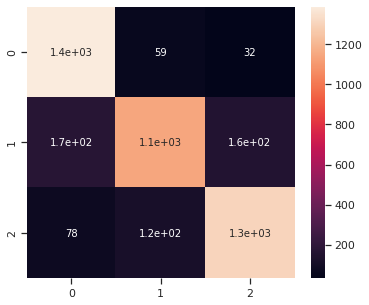

In [ ]:
#Matriz de confusion graficada 
matriz2 = pd.DataFrame(matriz)

sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(6, 5))
sns.heatmap(matriz2,annot=True)

In [ ]:

# Informe de clasificación de validación cruzada
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.85      0.94      0.89      1480
           2       0.87      0.78      0.82      1475
           3       0.87      0.87      0.87      1501

    accuracy                           0.86      4456
   macro avg       0.86      0.86      0.86      4456
weighted avg       0.86      0.86      0.86      4456



In [ ]:
from sklearn.model_selection import GridSearchCV
# Use scikit-learn to grid search the batch size and epochs
# create model
def create_model(optimizer='Adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=38, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.410504 using {'optimizer': 'RMSprop'}
0.371647 (0.011750) with: {'optimizer': 'SGD'}
0.410504 (0.013142) with: {'optimizer': 'RMSprop'}
0.335386 (0.005404) with: {'optimizer': 'Adagrad'}
0.358569 (0.035078) with: {'optimizer': 'Adadelta'}
0.409158 (0.012205) with: {'optimizer': 'Adam'}
0.403387 (0.009739) with: {'optimizer': 'Adamax'}
0.408388 (0.012234) with: {'optimizer': 'Nadam'}


In [ ]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=c_model)

batch_sizes = [50, 100]
epochs = [50, 70, 250]
parameters = {'batch_size': batch_sizes, 'epochs': epochs}
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
167/167 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9332
Epoch 110/250
167/167 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9287
Epoch 111/250
167/167 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9267
Epoch 112/250
167/167 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9287
Epoch 113/250
167/167 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9299
Epoch 114/250
167/167 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9354
Epoch 115/250
167/167 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9295
Epoch 116/250
167/167 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9332
Epoch 117/250
167/167 [==============================] - 1s 3ms/step - loss: 0.1876 - accuracy: 0.9367
Epoch 118/250
167/167 [===

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6c64488a90>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [50, 100], 'epochs': [50, 70, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:

print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parammeter in zip(means, parameters):
    print(mean, parammeter)

0.8433225750923157 {'batch_size': 50, 'epochs': 250}
0.8020596504211426 {'batch_size': 50, 'epochs': 50}
0.8186023712158204 {'batch_size': 50, 'epochs': 70}
0.8433225750923157 {'batch_size': 50, 'epochs': 250}
0.795421051979065 {'batch_size': 100, 'epochs': 50}
0.8106195211410523 {'batch_size': 100, 'epochs': 70}
0.8350488066673278 {'batch_size': 100, 'epochs': 250}


#15. Modelo Final



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(12, activation='relu', name='dense_1')(inputs)
x = layers.Dense(1, activation='relu', name='dense_2')(x)
outputs = layers.Dense(2, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='3_layer_mlp')
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop())
history = model.fit(X_train, y_train,
                    batch_size=12,
                    epochs=1)

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                9420      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
_________________________________________________________________
predictions (Dense)          (None, 2)                 4         
Total params: 9,437
Trainable params: 9,437
Non-trainable params: 0
_________________________________________________________________


NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer='Adam'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=38, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
import pickle
from sklearn.externals import joblib

# Save the Keras model first:
model.model.save('keras_model.h5')

In [ ]:

# Finally, save the pipeline:
joblib.dump(pipeline, 'keras_model.h5')

['keras_model.h5']

In [ ]:
model= joblib.load('keras_model.h5')

In [ ]:
X_train


,Edad,SignosVitales,Antecedentes_familiares,IMC,TrigliceridosResultado,ResultColestTotal,Talla,Resultado,ResultHDL.1,DM1DM2,Pulso,Nefropatia_diabetica,CausaExterna,Edad.1,ResultLDL,Resultado.1,Peso,ResultCreatinina,Tension_arterial_sistolica,SMC,FC,Disfuncion_renal,ResultHDL,PAS_PAD_T2_2,RsCsRs,Dislipidemia.1,Edemas,FR,Tension_arterial_diastolica,Pulso.1,DietaBajaSal,PAS_PAD_T1_2,CodigoDiagnosticoPrincipal_I10X,ECVICT,Cefalea,Quirurgicos,ICC,PMI
4132,0.251197,0.213704,-0.110340,-0.053753,-0.119473,-0.035169,-0.284651,-0.134375,0.249699,-0.279882,-0.169051,0.012060,-0.170568,-0.170568,0.028741,-0.036901,0.001060,-0.190821,0.103415,0.001060,0.056880,-0.116762,0.223521,0.223521,-0.067601,-0.196932,0.120825,0.065426,0.135196,-0.263151,-0.263151,-0.095115,0.208820,-0.015576,0.067857,-0.288778,-0.000838,0.089388
1704,0.034759,-0.053833,-0.015268,-0.007438,-0.016532,-0.004867,0.039168,0.079804,0.031467,0.032988,0.068335,-0.014770,0.073388,0.073388,0.003977,0.002458,0.680389,-0.026405,0.014310,0.680389,0.047082,0.064658,0.007885,0.007885,0.011889,0.004162,0.016719,0.053274,0.049005,0.117442,0.117442,-0.013161,0.028895,-0.002155,0.015777,-0.039959,0.009456,0.012369
9976,0.200236,0.118012,-0.060932,-0.029684,-0.065975,-0.019421,0.156311,-0.074204,0.211751,-0.207557,-0.093246,-0.003184,-0.094337,-0.094337,-0.095756,-0.020377,0.011315,-0.105375,-0.421105,0.011315,-0.142460,-0.241672,-0.163609,-0.163609,-0.065589,-0.080394,-0.364009,0.032119,0.074658,0.133920,0.133920,0.469347,-0.209339,0.034422,0.037472,-0.031608,-0.076860,0.049362
6145,-0.345583,0.159924,-0.082572,-0.040226,-0.089407,-0.026319,0.211825,-0.100558,-0.330298,0.379514,-0.126042,0.049688,-0.122095,-0.122095,-0.014086,0.013291,-0.018595,-0.142799,0.077390,-0.018595,-0.243545,0.235856,-0.114712,-0.114712,-0.050589,0.032620,0.090419,0.201150,0.101173,0.210952,0.210952,-0.071178,0.156269,0.104951,0.050780,-0.337394,-0.000627,0.066893
1533,-0.489190,-0.319596,-0.090644,-0.044158,-0.098147,-0.028892,-0.233840,-0.110388,-0.509093,-0.056461,-0.138779,0.025745,-0.138490,-0.138490,0.023611,0.014591,0.000871,-0.156759,0.084955,0.000871,-0.156501,-0.070203,-0.101249,-0.101249,-0.181649,-0.015993,0.099258,-0.017852,-0.068805,-0.188277,-0.188277,-0.078137,0.171545,0.051208,0.055744,-0.047021,-0.000688,0.073432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.183519,-0.222209,-0.073493,-0.035803,-0.079577,-0.023425,-0.189596,-0.089502,0.181164,-0.115585,-0.112161,-0.000027,-0.111959,-0.111959,-0.070071,0.011830,-0.047889,-0.127099,0.068881,-0.047889,-0.072964,0.209975,-0.031976,-0.031976,0.227647,0.156468,0.080477,-0.041166,-0.055787,0.487823,0.487823,-0.063353,0.139088,-0.000831,-0.010643,-0.318202,-0.042395,0.059538
3264,-0.063257,-0.296428,-0.084073,-0.040957,-0.091032,-0.026797,-0.216889,-0.102386,-0.098501,0.240153,0.325906,-0.081330,0.374850,0.374850,0.021899,0.013533,0.000807,-0.145395,0.078797,0.000807,-0.155438,-0.161660,-0.251380,-0.251380,-0.090499,0.107572,0.092062,0.049851,0.103012,0.139935,0.139935,-0.072472,0.159110,-0.011868,0.051703,-0.220033,-0.000639,0.068109
9845,-0.009048,0.202071,-0.104333,-0.050827,-0.112970,-0.033255,-0.269156,-0.127060,0.010488,-0.469964,-0.159875,-0.011206,-0.163218,-0.163218,0.024013,-0.034892,0.001433,0.395117,0.097786,0.001433,0.058037,0.053659,-0.165228,-0.165228,0.026045,-0.301876,0.114248,0.157073,0.142400,-0.073738,-0.073738,-0.089937,-0.358451,0.058941,-0.016996,-0.054122,-0.061599,0.084523
10799,0.248354,-0.257342,-0.135391,-0.065957,-0.146598,-0.043154,0.347324,0.448084,0.281977,-0.011140,-0.207126,0.039216,-0.205798,-0.205798,0.007289,-0.045278,-0.068717,-0.011951,-0.189224,-0.068717,-0.016277,-0.087968,-0.044172,-0.044172,0.174963,-0.217325,0.148257,0.148637,-0.211582,-0.103907,-0.103907,-0.116709,0.041621,0.076487,0.100114,-0.070233,-0.001028,0.109683


In [ ]:
#parametros que espera el modelo predictor
X = X_test.sample(1)
X

,Edad,SignosVitales,Antecedentes_familiares,IMC,TrigliceridosResultado,ResultColestTotal,Talla,Resultado,ResultHDL.1,DM1DM2,Pulso,Nefropatia_diabetica,CausaExterna,Edad.1,ResultLDL,Resultado.1,Peso,ResultCreatinina,Tension_arterial_sistolica,SMC,FC,Disfuncion_renal,ResultHDL,PAS_PAD_T2_2,RsCsRs,Dislipidemia.1,Edemas,FR,Tension_arterial_diastolica,Pulso.1,DietaBajaSal,PAS_PAD_T1_2,CodigoDiagnosticoPrincipal_I10X,ECVICT,Cefalea,Quirurgicos,ICC,PMI
5091,-0.008196,0.108277,-0.055905,0.796233,-0.060533,-0.017819,-0.144223,-0.068083,0.00227,-0.132081,-0.085416,-0.001257,-0.08575,-0.08575,0.032636,-0.018696,0.010382,-0.096682,-0.386367,0.010382,-0.073734,-0.10561,-0.022266,-0.022266,0.017603,0.006111,0.061218,0.226348,-0.042436,-0.037254,-0.037254,-0.048191,-0.19207,0.031583,0.010992,-0.029001,-0.035472,0.04529


In [ ]:
model.predict([X])[0]

ValueError: ignored